#                               Electirc Vehicle Dataset 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings('ignore', category=ConvergenceWarning)
from scipy.stats import ttest_ind

In [2]:
# Load the dataset
data_set=pd.read_csv('Electric_Vehicle_Population_Data.csv')
# Display the first 5 rows of the dataset
data_set.head(5)

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,WAUTPBFF4H,King,Seattle,WA,98126.0,2017,AUDI,A3,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,16,0,34.0,235085336,POINT (-122.374105 47.54468),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
1,WAUUPBFF2J,Thurston,Olympia,WA,98502.0,2018,AUDI,A3,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,16,0,22.0,237896795,POINT (-122.943445 47.059252),PUGET SOUND ENERGY INC,5.306701e+10
2,5YJSA1E22H,Thurston,Lacey,WA,98516.0,2017,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,22.0,154498865,POINT (-122.78083 47.083975),PUGET SOUND ENERGY INC,5.306701e+10
3,1C4JJXP62M,Thurston,Tenino,WA,98589.0,2021,JEEP,WRANGLER,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,25,0,20.0,154525493,POINT (-122.85403 46.856085),PUGET SOUND ENERGY INC,5.306701e+10
4,5YJ3E1EC9L,Yakima,Yakima,WA,98902.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,308,0,14.0,225996361,POINT (-120.524012 46.5973939),PACIFICORP,5.307700e+10


# Data Understanding

In [3]:
#Q.1:How many rows and columns are there in the dataset?
num_rows, num_columns = data_set.shape
print(f'Number of rows: {num_rows}')
print(f'Number of columns: {num_columns}')

Number of rows: 181458
Number of columns: 17


In [4]:
#Q.2:What are the data types of each variable in the dataset (e.g., integer, float, string/object, datetime)?
data_set.dtypes

VIN (1-10)                                            object
County                                                object
City                                                  object
State                                                 object
Postal Code                                          float64
Model Year                                             int64
Make                                                  object
Model                                                 object
Electric Vehicle Type                                 object
Clean Alternative Fuel Vehicle (CAFV) Eligibility     object
Electric Range                                         int64
Base MSRP                                              int64
Legislative District                                 float64
DOL Vehicle ID                                         int64
Vehicle Location                                      object
Electric Utility                                      object
2020 Census Tract       

In [5]:
#Q.3:Are there any variables with unexpected or incorrect data types?
data_set.isnull().sum()    

VIN (1-10)                                             0
County                                                 3
City                                                   3
State                                                  0
Postal Code                                            3
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 398
DOL Vehicle ID                                         0
Vehicle Location                                       8
Electric Utility                                       3
2020 Census Tract                                      3
dtype: int64

In [6]:
#Q.4:How many numeric variables are there in the dataset?
numeric_vars = data_set.select_dtypes(include=['number']).columns
print(f'\nNumeric variables: {len(numeric_vars)}')


Numeric variables: 7


In [7]:
#Q.5:How many categorical variables are there in the dataset?
#select_dtypes selects the column based on their data type.
categorical_vars = data_set.select_dtypes(include=['object']).columns
print(f'Categorical variables: {len(categorical_vars)}')

Categorical variables: 10


In [8]:
#Q.6:Are there any datetime variables in the dataset? 
datetime_vars = data_set.select_dtypes(include=['datetime']).columns
print(f'Datetime variables: {len(datetime_vars)}')

Datetime variables: 0


In [9]:
#Q.7:Are there any boolean variables (True/False) in the dataset? 
boolean_vars = data_set.select_dtypes(include=['bool']).columns
has_boolean_vars = len(boolean_vars) > 0
print(f'Boolean variables: {has_boolean_vars}')

Boolean variables: False


In [10]:
# Q.8:Are there any variables that need to be converted to a different data type for analysis? 

#Convert Postal Code to object (since it's an identifier)
data_set['Postal Code'] = data_set['Postal Code'].astype('object')

# Convert categorical variables to category type
categorical_columns = [
    'County', 'City', 'State', 'Make', 'Model', 
    'Electric Vehicle Type', 'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 
    'Electric Utility'
]
for column in categorical_columns:
    data_set[column] = data_set[column].astype('category')

# Convert Legislative District to integer if it represents district numbers
data_set['Legislative District'] = data_set['Legislative District'].astype('Int64')

# Convert Base MSRP to float
data_set['Base MSRP'] = data_set['Base MSRP'].astype('float')

# Display the updated data types
print(data_set.dtypes)


VIN (1-10)                                             object
County                                               category
City                                                 category
State                                                category
Postal Code                                            object
Model Year                                              int64
Make                                                 category
Model                                                category
Electric Vehicle Type                                category
Clean Alternative Fuel Vehicle (CAFV) Eligibility    category
Electric Range                                          int64
Base MSRP                                             float64
Legislative District                                    Int64
DOL Vehicle ID                                          int64
Vehicle Location                                       object
Electric Utility                                     category
2020 Cen

# Missing values 

In [11]:
# Which columns have missing values? How many missing values are there in each column? 
missing_values = data_set.isnull().sum()
columns_with_missing_values = missing_values[missing_values > 0]

print(columns_with_missing_values)

County                    3
City                      3
Postal Code               3
Legislative District    398
Vehicle Location          8
Electric Utility          3
2020 Census Tract         3
dtype: int64



# Duplicates

In [12]:
# Are there any duplicate records in the dataset? If so, how many?
#use .duplicated() for duplicate records.
duplicate_records = data_set.duplicated()
#for adding all duplicate records.
num_duplicate_records = duplicate_records.sum()
print(f'Number of duplicate records: {num_duplicate_records}')

Number of duplicate records: 0


# Unique Values

In [13]:
#For categorical columns like 'County', 'City', 'State', 'Make', 'Model', 'Electric 
#Vehicle Type', 'Clean Alternative Fuel Vehicle Eligibility', 'Electric Utility', how many unique values are there in each 
#column?
categorical_columns = [
    'County', 'City', 'State', 'Make', 'Model', 
    'Electric Vehicle Type', 'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Utility'
]
unique_values_count = {col: data_set[col].nunique() for col in categorical_columns}
print(unique_values_count)

{'County': 193, 'City': 726, 'State': 44, 'Make': 40, 'Model': 143, 'Electric Vehicle Type': 2, 'Clean Alternative Fuel Vehicle (CAFV) Eligibility': 3, 'Electric Utility': 76}


# Count of Unique Values in Categorical Columns

In [14]:
"""Count of Unique Values in Categorical Columns: What is the count of each
unique value in categorical columns like 
'County', 'City', 'State', 'Make', 'Model', 'Electric Vehicle Type', 'Clean Alternative Fuel Vehicle Eligibility',
'Electric Utility'?"""

unique_values_counts = {col: data_set[col].value_counts() for col in categorical_columns}

# Print the unique value counts for each column
for col, counts in unique_values_counts.items():
    print(f'\nCounts of unique values in {col}:')
    print(counts)



Counts of unique values in County:
County
King         94460
Snohomish    21439
Pierce       14043
Clark        10675
Thurston      6600
             ...  
Larimer          1
Laramie          1
Lane             1
Kent             1
Yuba             1
Name: count, Length: 193, dtype: int64

Counts of unique values in City:
City
Seattle         30045
Bellevue         9117
Redmond          6568
Vancouver        6329
Bothell          5961
                ...  
Conyers             1
Newport News        1
Newbury Park        1
Newark              1
Martinez            1
Name: count, Length: 726, dtype: int64

Counts of unique values in State:
State
WA    181060
CA       102
VA        47
MD        32
TX        26
NC        17
CO        15
IL        15
AZ        12
FL        10
HI         9
NV         9
NJ         8
CT         7
SC         7
AL         7
GA         6
OR         6
NY         5
MO         5
OH         4
MA         4
LA         4
ID         4
PA         3
UT         3
KY        

# Summary Statistics

In [15]:
"""1. What are the summary statistics (mean, median, min, max, etc.) for numerical variables like 'Electric Range' and 'Base 
MSRP'?"""
numerical_columns = ['Electric Range', 'Base MSRP']
summary_statistics = data_set[numerical_columns].describe()
print(summary_statistics)

       Electric Range      Base MSRP
count   181458.000000  181458.000000
mean        57.826665    1040.236749
std         91.396074    8228.989085
min          0.000000       0.000000
25%          0.000000       0.000000
50%          0.000000       0.000000
75%         75.000000       0.000000
max        337.000000  845000.000000


In [16]:
#2. What are the summary statistics for categorical columns? 
categorical_columns = [
    'County', 'City', 'State', 'Make', 'Model', 
    'Electric Vehicle Type', 'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Utility'
]
data_set[categorical_columns].describe()

,County,City,State,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Utility
count,181455,181455,181458,181458,181458,181458,181458,181455
unique,193,726,44,40,143,2,3,76
top,King,Seattle,WA,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)
freq,94460,30045,181060,80819,37007,141973,94730,67180


# Skewness in Numerical Variables

In [17]:
#Are there any numerical variables with significant skewness?
skewness = data_set[numeric_vars].skew()

# Identify columns with significant skewness
significant_skewness = skewness[abs(skewness) > 1]

# Print the columns with significant skewness
print("Columns with significant skewness:")
print(significant_skewness)

Columns with significant skewness:
Postal Code         -30.256581
Model Year           -1.148046
Electric Range        1.476105
Base MSRP            13.637558
2020 Census Tract   -26.789474
dtype: object


In [18]:
# How skewed are variables like 'Electric Range' and 'Base MSRP'?
skewness_electric_range = data_set['Electric Range'].skew()
skewness_base_msrp = data_set['Base MSRP'].skew()

print("Skewness for Electric Range:", skewness_electric_range)
print("Skewness for Base MSRP:", skewness_base_msrp)

Skewness for Electric Range: 1.4761052360034608
Skewness for Base MSRP: 13.637558395236882


# Univariate Analysis

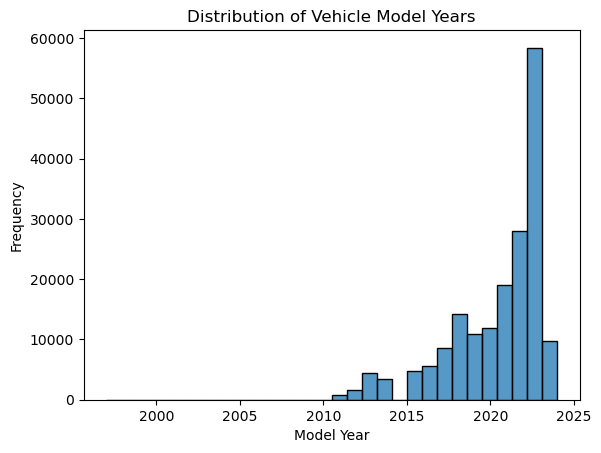

In [19]:
#Q.1:What is the distribution of vehicle model years? 
sns.histplot(data_set['Model Year'], bins=30)
plt.title('Distribution of Vehicle Model Years')
plt.xlabel('Model Year')
plt.ylabel('Frequency')
plt.show()

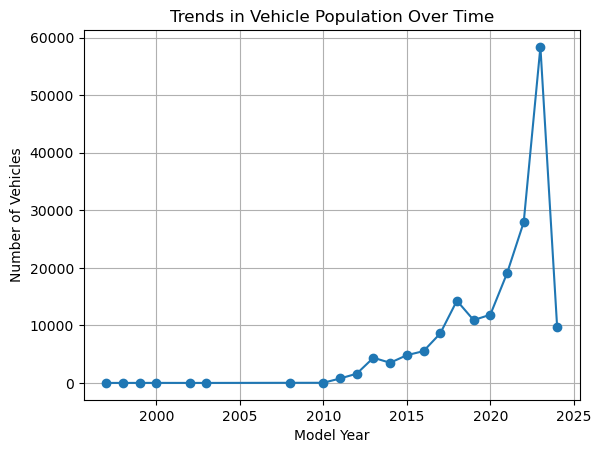

In [20]:
#Q.2:Are there any noticeable trends or patterns in the distribution over time? 
yearly_counts = data_set.groupby('Model Year').size()
plt.plot(yearly_counts.index, yearly_counts.values, marker='o')
plt.title('Trends in Vehicle Population Over Time')
plt.xlabel('Model Year')
plt.ylabel('Number of Vehicles')
plt.grid()
plt.show()

In [21]:
#Q.3:How many unique car makes are there in the dataset? 
unique_makes = data_set['Make'].nunique()
print("Number of unique car makes:", unique_makes)


Number of unique car makes: 40


In [22]:
#Q.4: What are the most common car makes? 
most_common_makes = data_set['Make'].value_counts().head(5)
print("Most common car makes:")
print(most_common_makes)

Most common car makes:
Make
TESLA        80819
NISSAN       14037
CHEVROLET    13864
FORD          9527
BMW           7680
Name: count, dtype: int64


In [23]:
#5. Number of different types of electric vehicles
unique_ev_types = data_set['Electric Vehicle Type'].nunique()
print("Number of different types of electric vehicles:", unique_ev_types)


Number of different types of electric vehicles: 2


In [24]:
# 6. Frequency of each electric vehicle type
ev_type_frequency = data_set['Electric Vehicle Type'].value_counts()
print("Frequency of each electric vehicle type:")
print(ev_type_frequency)


Frequency of each electric vehicle type:
Electric Vehicle Type
Battery Electric Vehicle (BEV)            141973
Plug-in Hybrid Electric Vehicle (PHEV)     39485
Name: count, dtype: int64


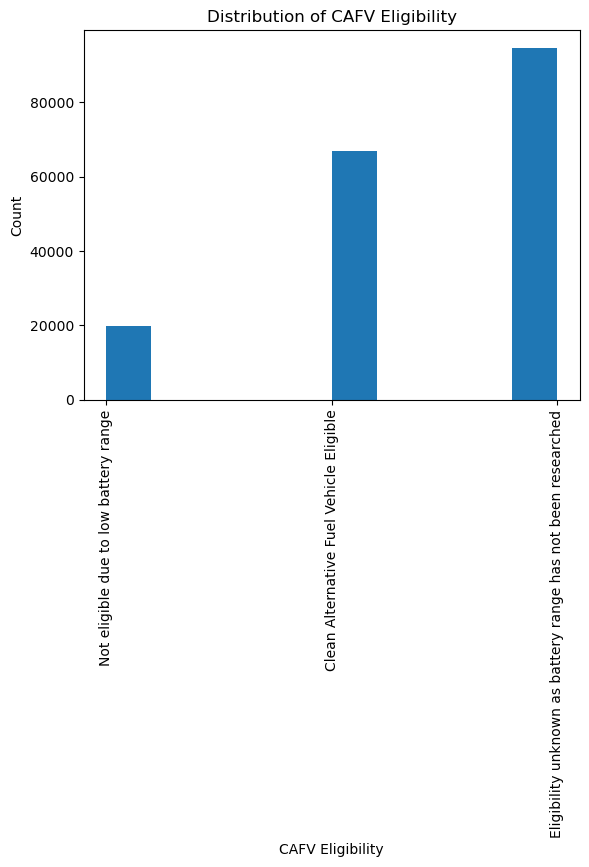

In [25]:
# 7. Distribution of clean alternative fuel vehicle eligibility
plt.hist(data=data_set, x='Clean Alternative Fuel Vehicle (CAFV) Eligibility')
plt.title('Distribution of CAFV Eligibility')
plt.xlabel('CAFV Eligibility')
plt.ylabel('Count')
plt.setp(plt.xticks()[1],rotation=90)
plt.show()

In [26]:
# 8. Number of vehicles eligible vs. not eligible
cafv_eligibility_counts = data_set['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].value_counts()
print("Number of vehicles eligible vs. not eligible:")
print(cafv_eligibility_counts)


Number of vehicles eligible vs. not eligible:
Clean Alternative Fuel Vehicle (CAFV) Eligibility
Eligibility unknown as battery range has not been researched    94730
Clean Alternative Fuel Vehicle Eligible                         66816
Not eligible due to low battery range                           19912
Name: count, dtype: int64


In [27]:
# 9. Range of electric ranges in the dataset
range_min = data_set['Electric Range'].min()
range_max = data_set['Electric Range'].max()
print("Range of electric ranges in the dataset:", range_min, "-", range_max)

Range of electric ranges in the dataset: 0 - 337


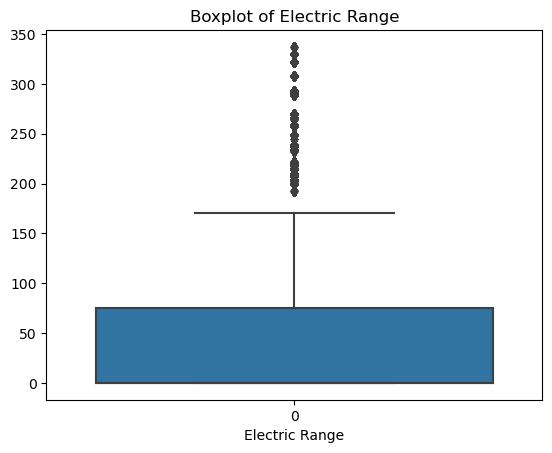

In [28]:
# 10. Check for outliers in electric range values
sns.boxplot(data_set['Electric Range'])
plt.title('Boxplot of Electric Range')
plt.xlabel('Electric Range')
plt.show()


C:\Users\ronit\AppData\Local\Temp\ipykernel_29712\1905370398.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_set['Base MSRP'], bins=30)


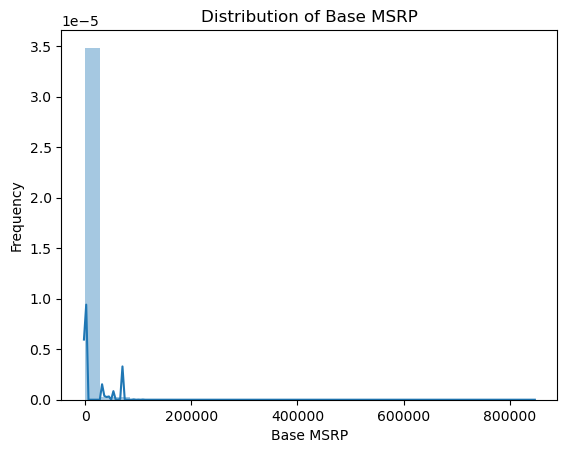

In [29]:
# 11. Distribution of base MSRP
sns.distplot(data_set['Base MSRP'], bins=30)
plt.title('Distribution of Base MSRP')
plt.xlabel('Base MSRP')                 
plt.ylabel('Frequency')
plt.show()

In [30]:
# 12. Check for high-priced or low-priced vehicles
highest_msrp = data_set.loc[data_set['Base MSRP'].idxmax()]
lowest_msrp = data_set.loc[data_set['Base MSRP'].idxmin()]
print("High-priced vehicle:", highest_msrp['Make'], highest_msrp['Model'], "with MSRP $", highest_msrp['Base MSRP'])
print("Low-priced vehicle:", lowest_msrp['Make'], lowest_msrp['Model'], "with MSRP $", lowest_msrp['Base MSRP'])


High-priced vehicle: PORSCHE 918 with MSRP $ 845000.0
Low-priced vehicle: AUDI A3 with MSRP $ 0.0


In [31]:
# 13. Number of unique counties
unique_counties = data_set['County'].nunique()
print("Number of unique counties:", unique_counties)


Number of unique counties: 193


In [32]:
# 14. Frequency of each county
county_frequency = data_set['County'].value_counts()
print("Frequency of each county:")
print(county_frequency)


Frequency of each county:
County
King         94460
Snohomish    21439
Pierce       14043
Clark        10675
Thurston      6600
             ...  
Larimer          1
Laramie          1
Lane             1
Kent             1
Yuba             1
Name: count, Length: 193, dtype: int64


In [33]:
# 15. Number of unique cities
unique_cities = data_set['City'].nunique()
print("Number of unique cities:", unique_cities)

Number of unique cities: 726


In [34]:
# 16. Frequency of each city
city_frequency = data_set['City'].value_counts()
print("Frequency of each city:")
print(city_frequency)


Frequency of each city:
City
Seattle         30045
Bellevue         9117
Redmond          6568
Vancouver        6329
Bothell          5961
                ...  
Conyers             1
Newport News        1
Newbury Park        1
Newark              1
Martinez            1
Name: count, Length: 726, dtype: int64


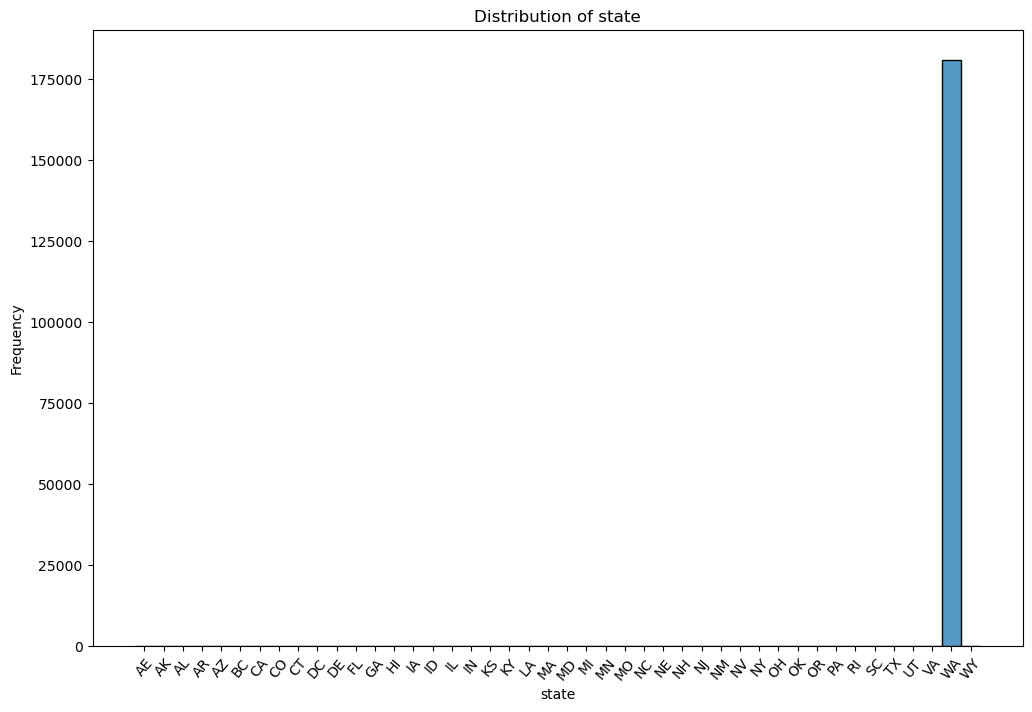

In [35]:
# 17. Distribution of states
plt.figure(figsize=((12,8)))
sns.histplot(data_set['State'], bins=30)
plt.title('Distribution of state')
plt.xlabel('state')                
plt.ylabel('Frequency')
plt.setp(plt.xticks()[1],rotation=50)
plt.show()

In [36]:
# 18. Check for overrepresented or underrepresented states
state_distribution = data_set['State'].value_counts()
state_percentage = state_distribution / len(data_set) * 100
print("Percentage representation of each state:")
print(state_percentage)

Percentage representation of each state:
State
WA    99.780665
CA     0.056211
VA     0.025901
MD     0.017635
TX     0.014328
NC     0.009369
CO     0.008266
IL     0.008266
AZ     0.006613
FL     0.005511
HI     0.004960
NV     0.004960
NJ     0.004409
CT     0.003858
SC     0.003858
AL     0.003858
GA     0.003307
OR     0.003307
NY     0.002755
MO     0.002755
OH     0.002204
MA     0.002204
LA     0.002204
ID     0.002204
PA     0.001653
UT     0.001653
KY     0.001653
IN     0.001653
DC     0.001653
RI     0.001102
WY     0.001102
NE     0.001102
MI     0.001102
KS     0.001102
BC     0.001102
AR     0.001102
NM     0.000551
NH     0.000551
OK     0.000551
MN     0.000551
AK     0.000551
IA     0.000551
DE     0.000551
AE     0.000551
Name: count, dtype: float64


In [37]:
# 19. Range of postal codes
postal_code_min = data_set['Postal Code'].min()
postal_code_max = data_set['Postal Code'].max()
print("Range of postal codes in the dataset:", postal_code_min, "-", postal_code_max)

Range of postal codes in the dataset: 1545.0 - 99577.0


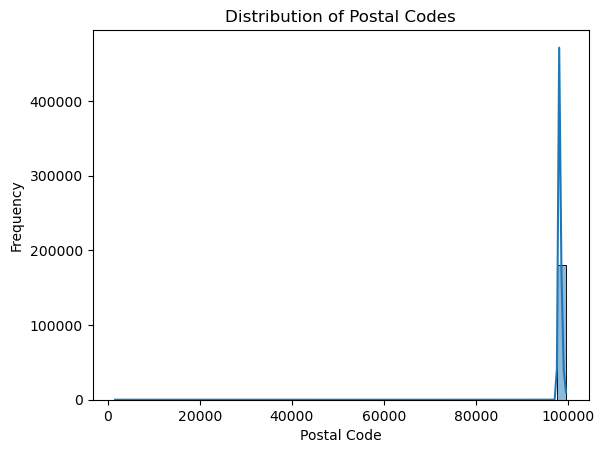

In [38]:
# 20. Check for patterns or clusters in postal code distribution
# Plot a histogram of postal codes
sns.histplot(data_set['Postal Code'], bins=50, kde=True)
plt.title('Distribution of Postal Codes')
plt.xlabel('Postal Code')
plt.ylabel('Frequency')                                
plt.show()

# Bivariate Analysis

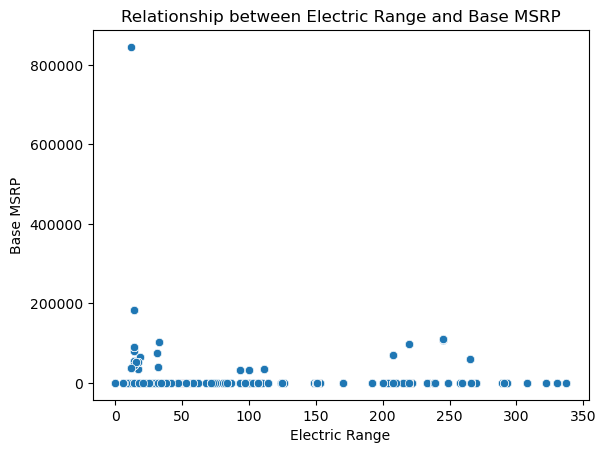

In [39]:
#1. Is there a relationship between electric range and base MSRP?
sns.scatterplot(data=data_set, x='Electric Range', y='Base MSRP')
plt.title('Relationship between Electric Range and Base MSRP')
plt.xlabel('Electric Range')
plt.ylabel('Base MSRP')                          
plt.show()


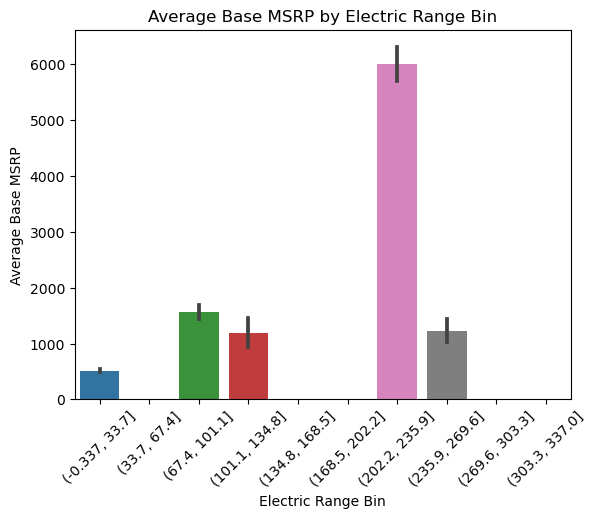

In [40]:
#2. Can we identify any patterns in the pricing based on the electric range?
# Create bins for electric range
data_set['Electric Range Bin'] = pd.cut(data_set['Electric Range'], bins=10)

# Plot average base MSRP for each electric range bin
sns.barplot(data=data_set, x='Electric Range Bin', y='Base MSRP')
plt.title('Average Base MSRP by Electric Range Bin')
plt.xlabel('Electric Range Bin')                      
plt.ylabel('Average Base MSRP')
plt.xticks(rotation=45)
plt.show()


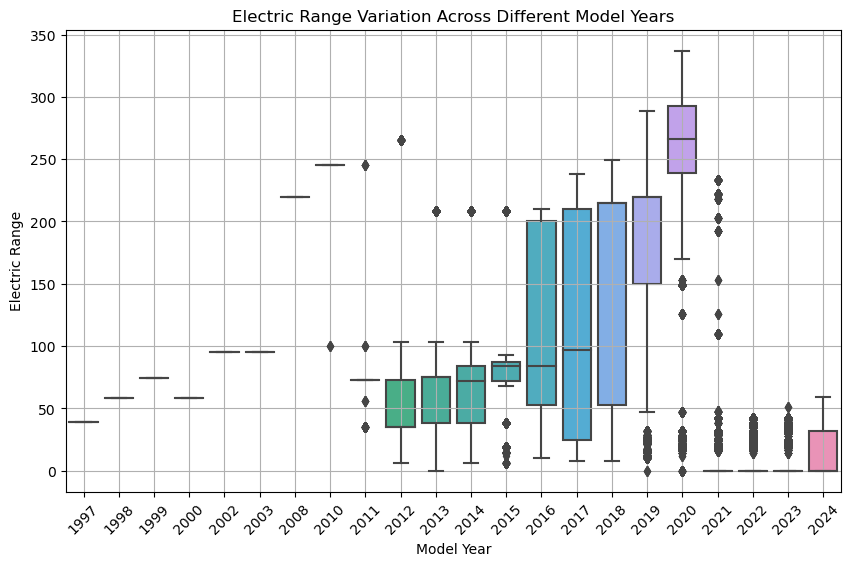

In [41]:
#3.How does the electric range vary across different model years? 
plt.figure(figsize=(10, 6))
sns.boxplot(data=data_set, x='Model Year', y='Electric Range')
plt.title('Electric Range Variation Across Different Model Years')
plt.xlabel('Model Year')
plt.ylabel('Electric Range')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


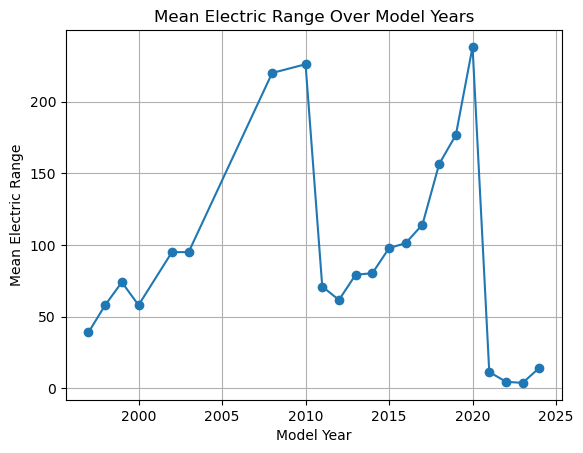

'If the plot shows an upward trend over the years: This indicates that, on average, newer models have longer electric ranges\ncompared to older models. In other words, there is a positive association between model year and electric range, suggesting\nthat advancements in technology or design are leading to improved electric range in newer vehicles.'

In [42]:
#4. Are newer models associated with longer electric ranges? 
mean_range_by_year = data_set.groupby('Model Year')['Electric Range'].mean()
plt.plot(mean_range_by_year.index, mean_range_by_year.values, marker='o')
plt.title('Mean Electric Range Over Model Years')
plt.xlabel('Model Year')
plt.ylabel('Mean Electric Range')
plt.grid(True)
plt.show()
"""If the plot shows an upward trend over the years: This indicates that, on average, newer models have longer electric ranges
compared to older models. In other words, there is a positive association between model year and electric range, suggesting
that advancements in technology or design are leading to improved electric range in newer vehicles."""

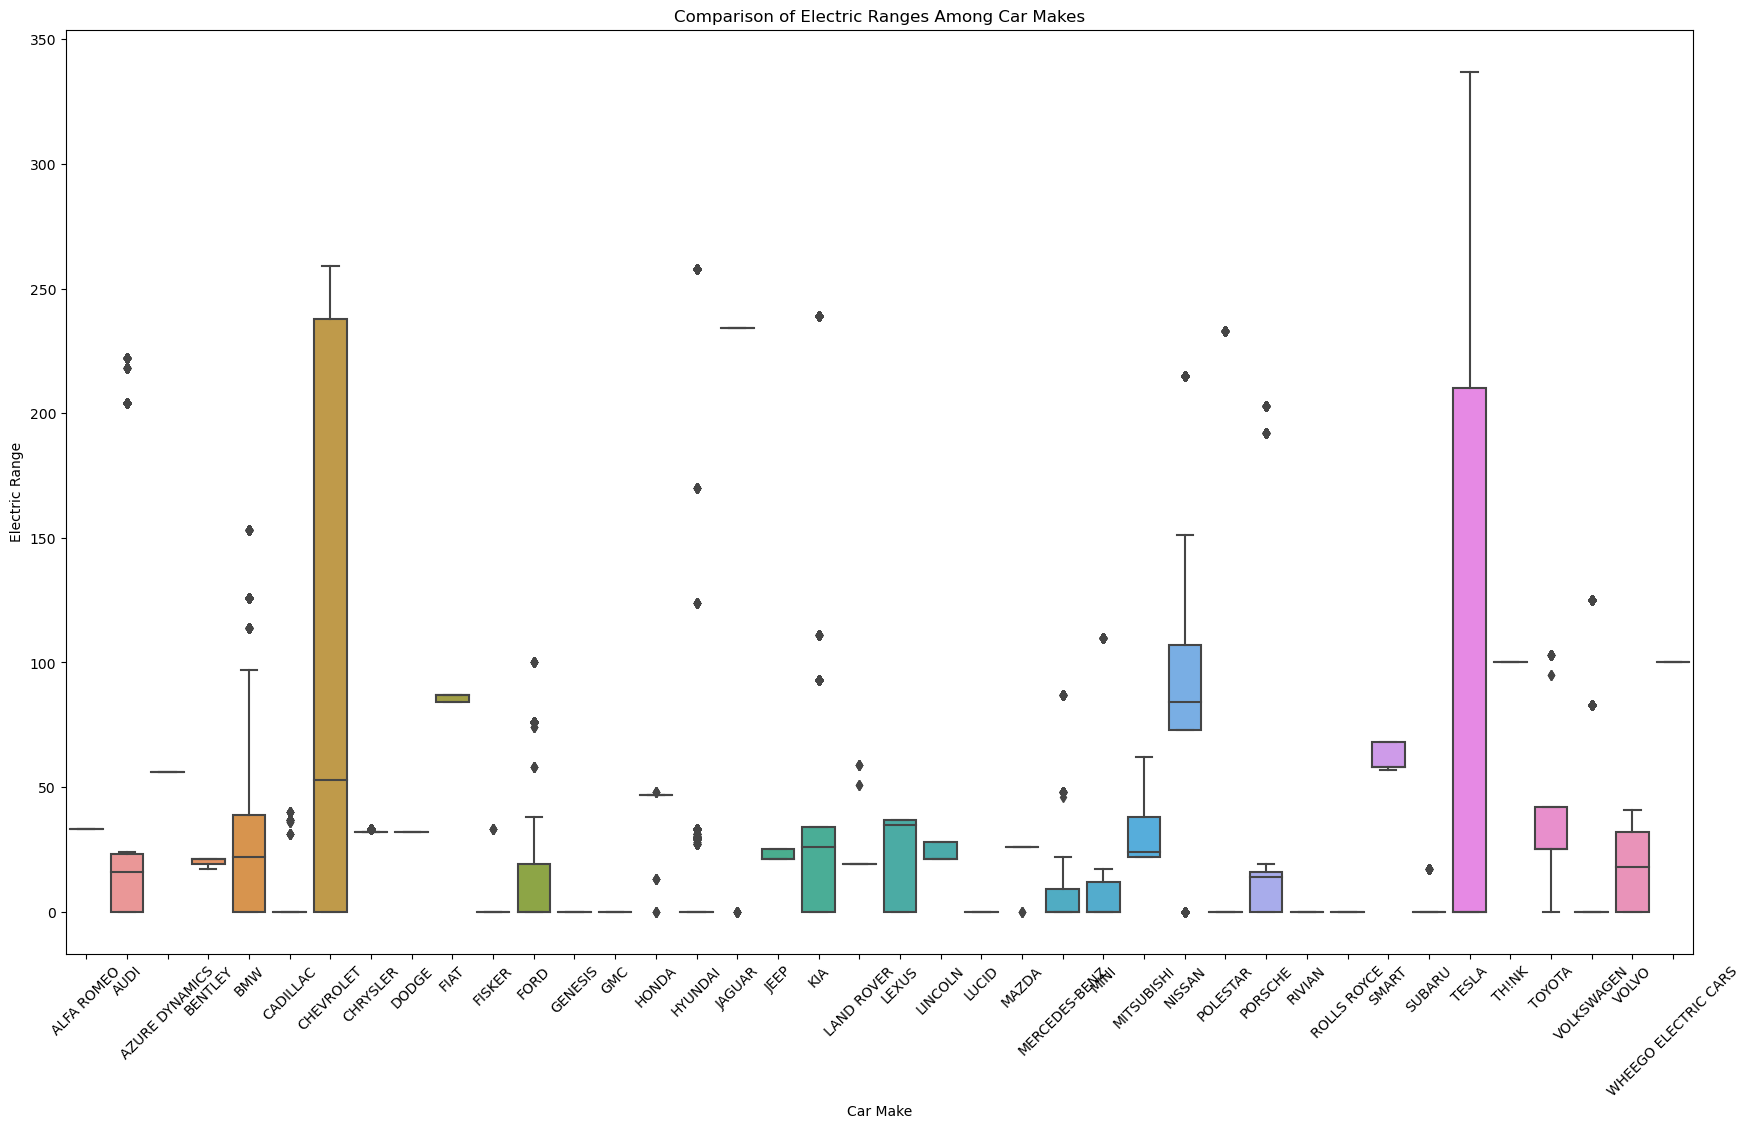

In [43]:
#5. Do different car makes have significantly different electric ranges? 
plt.figure(figsize=((21, 12)))
sns.boxplot(data=data_set, x='Make', y='Electric Range')
plt.title('Comparison of Electric Ranges Among Car Makes')
plt.xlabel('Car Make')
plt.ylabel('Electric Range')
plt.xticks(rotation=45)
plt.show()


In [44]:
#6. Which make tends to offer vehicles with the longest electric ranges?
mean_range_by_make = data_set.groupby('Make')['Electric Range'].mean()
make_with_longest_range = mean_range_by_make.idxmax()
print("Make offering vehicles with the longest electric ranges:", make_with_longest_range)


Make offering vehicles with the longest electric ranges: JAGUAR


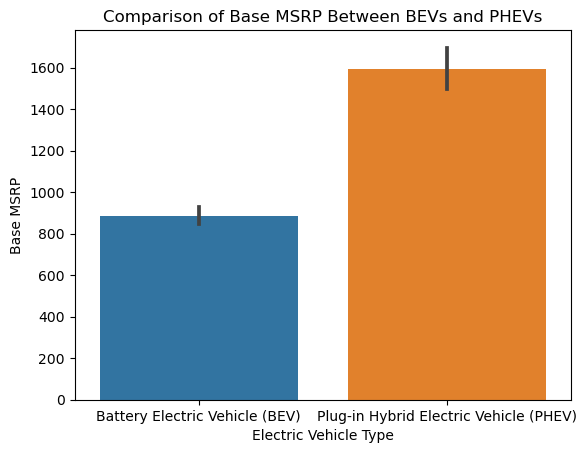

In [45]:
#7. Is there a difference in base MSRP between different types of electric vehicles?
sns.barplot(data=data_set, x='Electric Vehicle Type', y='Base MSRP')
plt.title('Comparison of Base MSRP Between BEVs and PHEVs')
plt.xlabel('Electric Vehicle Type')
plt.ylabel('Base MSRP')
plt.show()


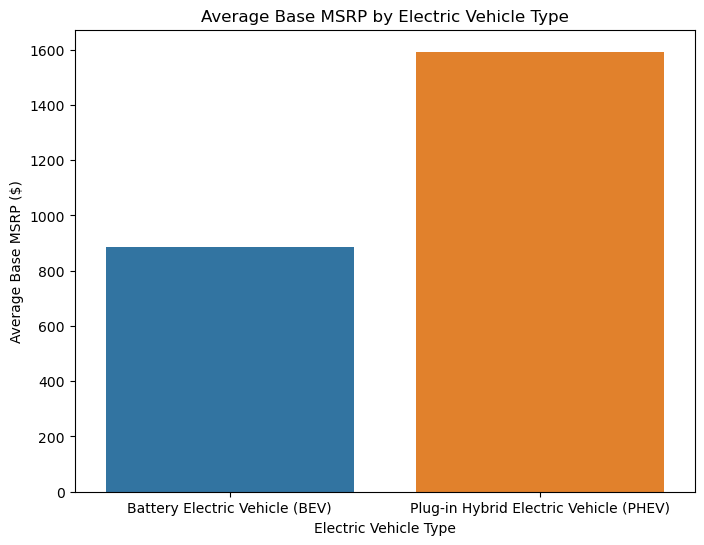

In [46]:
#8. Are battery electric vehicles (BEVs) typically more expensive than plug-in hybrid electric vehicles (PHEVs)? 

# Calculate the average Base MSRP for BEVs and PHEVs
average_msrp_by_type = data_set.groupby('Electric Vehicle Type')['Base MSRP'].mean()

# Plot the comparison
plt.figure(figsize=(8, 6))
sns.barplot(x=average_msrp_by_type.index, y=average_msrp_by_type.values)
plt.title('Average Base MSRP by Electric Vehicle Type')
plt.xlabel('Electric Vehicle Type')
plt.ylabel('Average Base MSRP ($)')
plt.show()
#if the average Base MSRP for PHEVs is higher, it suggests that PHEVs are typically more expensive.


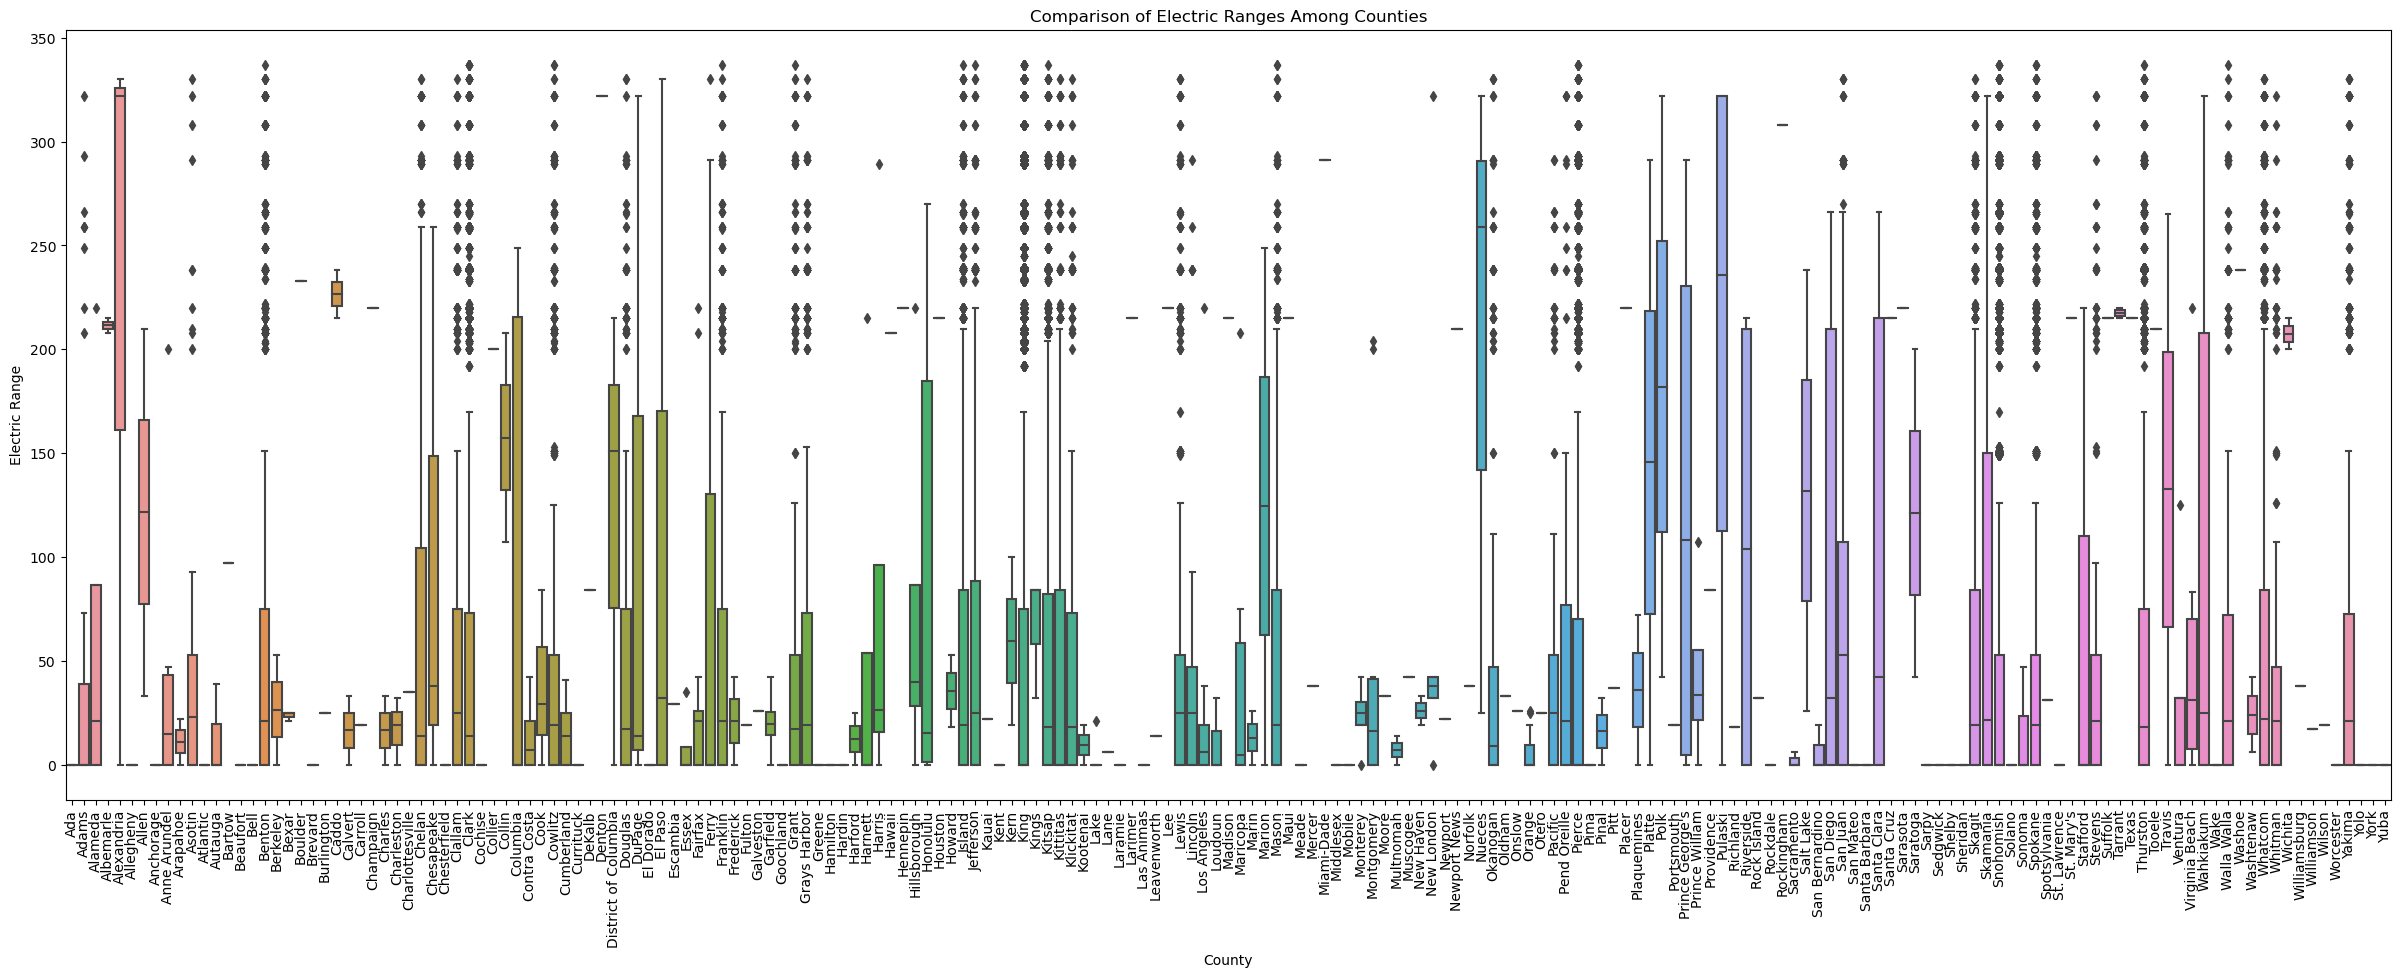

In [47]:
#9. Are there any differences in electric range among vehicles from different counties? 
plt.figure(figsize=(30, 10))
sns.boxplot(data=data_set, x='County', y='Electric Range')
plt.title('Comparison of Electric Ranges Among Counties')
plt.xlabel('County')
plt.ylabel('Electric Range')
plt.xticks(rotation=90)
plt.show()


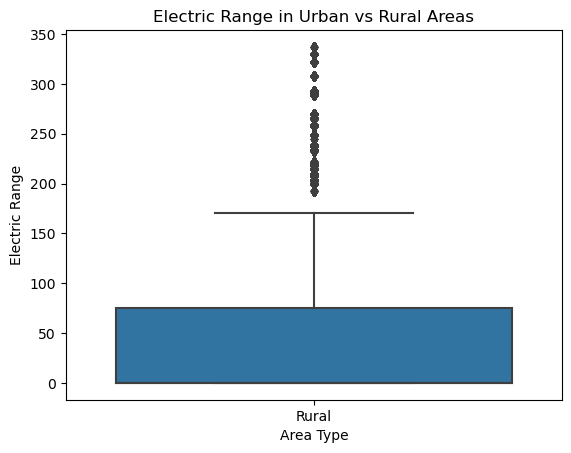

In [48]:
#10. Do vehicles from urban areas tend to have longer electric ranges compared to rural areas? 
# Assuming a hypothetical function to classify counties (you'll need actual criteria for this)
def is_urban(county):
    urban_counties = ['Urban County 1', 'Urban County 2']  # Replace with actual criteria
    return county in urban_counties

data_set['Area Type'] = data_set['County'].apply(lambda x: 'Urban' if is_urban(x) else 'Rural')

sns.boxplot(data=data_set, x='Area Type', y='Electric Range')
plt.title('Electric Range in Urban vs Rural Areas')
plt.xlabel('Area Type')
plt.ylabel('Electric Range')
plt.show()


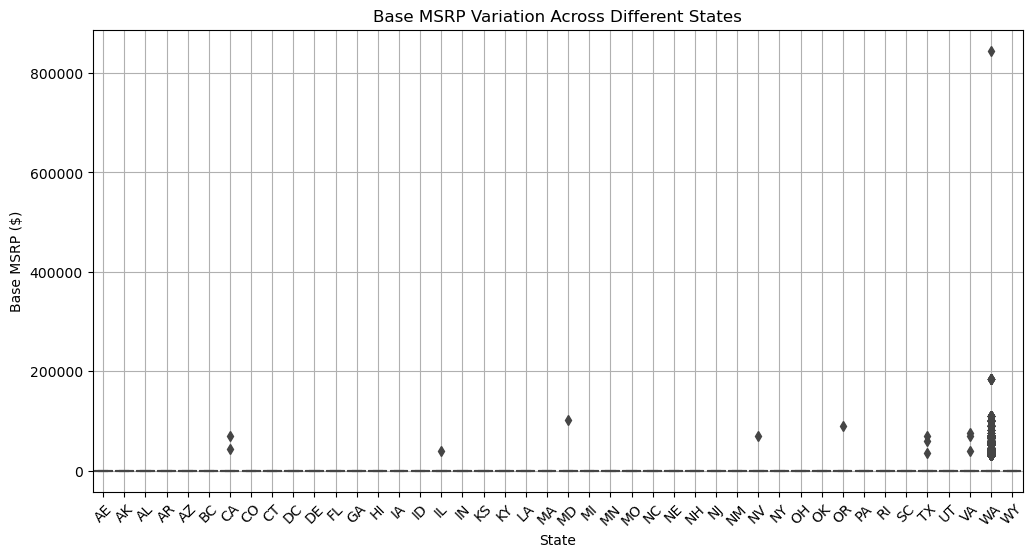

In [49]:
#11. How does base MSRP vary across different states? 
plt.figure(figsize=(12, 6))
sns.boxplot(data=data_set, x='State', y='Base MSRP')
plt.title('Base MSRP Variation Across Different States')
plt.xlabel('State')
plt.ylabel('Base MSRP ($)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [50]:
#12. Are there any states where electric vehicles are generally more expensive?
mean_msrp_by_state = data_set.groupby('State')['Base MSRP'].mean().sort_values(ascending=False)
print("States where electric vehicles are generally more expensive:")
print(mean_msrp_by_state.head())


States where electric vehicles are generally more expensive:
State
OR    15116.666667
NV     7766.666667
TX     6338.269231
VA     3935.957447
MD     3187.500000
Name: Base MSRP, dtype: float64


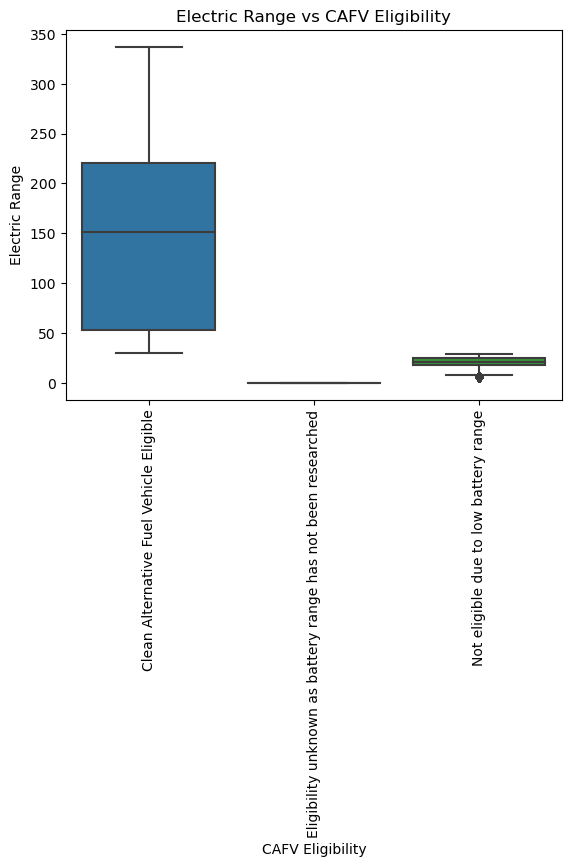

In [51]:
#13. Is there a difference in electric range between vehicles that are eligible for clean
#alternative fuel vehicle incentives and those that are not? 
sns.boxplot(data=data_set, x='Clean Alternative Fuel Vehicle (CAFV) Eligibility', y='Electric Range')
plt.title('Electric Range vs CAFV Eligibility')
plt.xlabel('CAFV Eligibility')
plt.ylabel('Electric Range')
plt.setp(plt.xticks()[1],rotation=90)
plt.show()


In [52]:
#14. Do eligible vehicles tend to have longer electric ranges? 
mean_range_by_cafv = data_set.groupby('Clean Alternative Fuel Vehicle (CAFV) Eligibility')['Electric Range'].mean()
print("Mean Electric Range by CAFV Eligibility:")
print(mean_range_by_cafv)


Mean Electric Range by CAFV Eligibility:
Clean Alternative Fuel Vehicle (CAFV) Eligibility
Clean Alternative Fuel Vehicle Eligible                         151.037790
Eligibility unknown as battery range has not been researched      0.000000
Not eligible due to low battery range                            20.157192
Name: Electric Range, dtype: float64


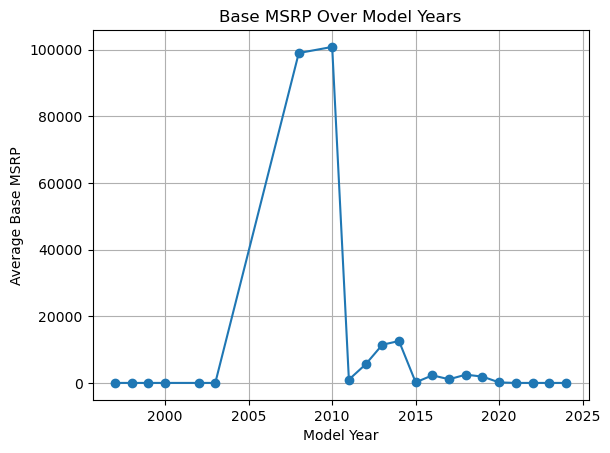

'If the plot shows an upward trend over the years: This indicates that, on average, newer models have higher base MSRPs \ncompared to older models. In other words, there is a positive association between model year and base MSRP, suggesting \nthat newer vehicles tend to be more expensive'

In [53]:
#15. How does base MSRP change over different model years? 
mean_msrp_by_year = data_set.groupby('Model Year')['Base MSRP'].mean()
plt.plot(mean_msrp_by_year.index, mean_msrp_by_year.values, marker='o')
plt.title('Base MSRP Over Model Years')
plt.xlabel('Model Year')
plt.ylabel('Average Base MSRP')
plt.grid(True)
plt.show()
"""If the plot shows an upward trend over the years: This indicates that, on average, newer models have higher base MSRPs 
compared to older models. In other words, there is a positive association between model year and base MSRP, suggesting 
that newer vehicles tend to be more expensive"""


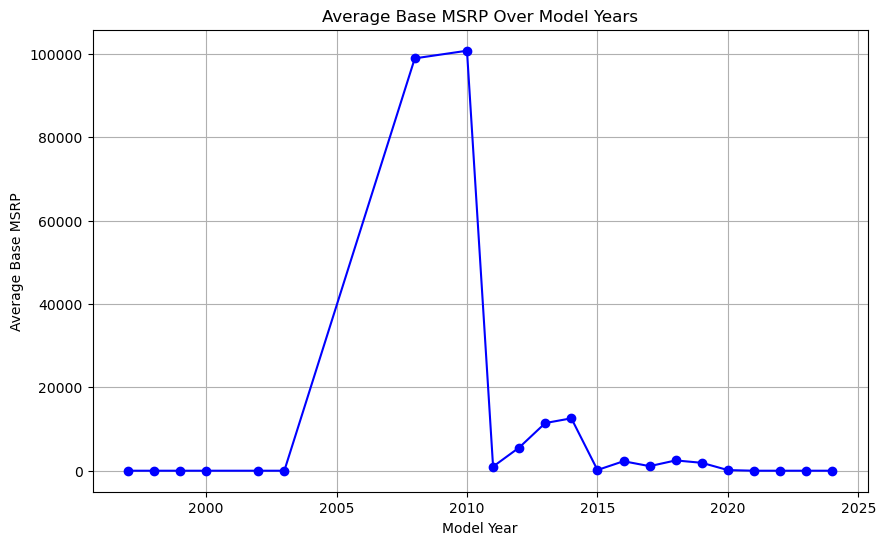

In [54]:
#16. Are newer models generally more expensive? 

# Assuming the dataset is already loaded into `data_set`

# Calculate the mean base MSRP for each model year
mean_msrp_by_year = data_set.groupby('Model Year')['Base MSRP'].mean()

# Plot the trend of average base MSRP over model years
plt.figure(figsize=(10, 6))
plt.plot(mean_msrp_by_year.index, mean_msrp_by_year.values, marker='o', linestyle='-', color='b')
plt.title('Average Base MSRP Over Model Years')
plt.xlabel('Model Year')
plt.ylabel('Average Base MSRP')
plt.grid(True)
plt.show()


Electric Vehicle Type  Battery Electric Vehicle (BEV)  \
County                                                  
Ada                                                 2   
Adams                                              38   
Alameda                                             3   
Albemarle                                           2   
Alexandria                                          3   
...                                               ...   
Worcester                                           1   
Yakima                                            716   
Yolo                                                1   
York                                                1   
Yuba                                                1   

Electric Vehicle Type  Plug-in Hybrid Electric Vehicle (PHEV)  
County                                                         
Ada                                                         0  
Adams                                                      14  
Al

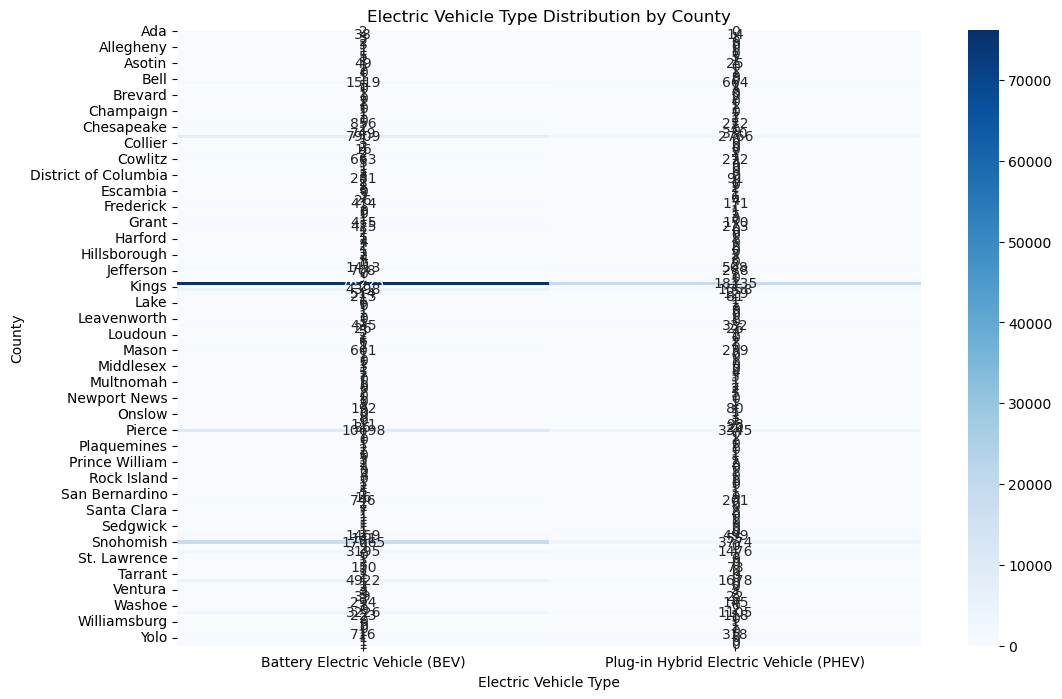

In [55]:
#17. Is there a relationship between the type of electric vehicle and the county where it is registered?


# Create a cross-tabulation of Electric Vehicle Type and County
ev_type_county_crosstab = pd.crosstab(data_set['County'], data_set['Electric Vehicle Type'])

# Display the cross-tabulation
print(ev_type_county_crosstab)

# Heatmap of Electric Vehicle Type by County
plt.figure(figsize=(12, 8))
sns.heatmap(ev_type_county_crosstab, annot=True, fmt='d', cmap='Blues')
plt.title('Electric Vehicle Type Distribution by County')
plt.xlabel('Electric Vehicle Type')
plt.ylabel('County')
plt.show()


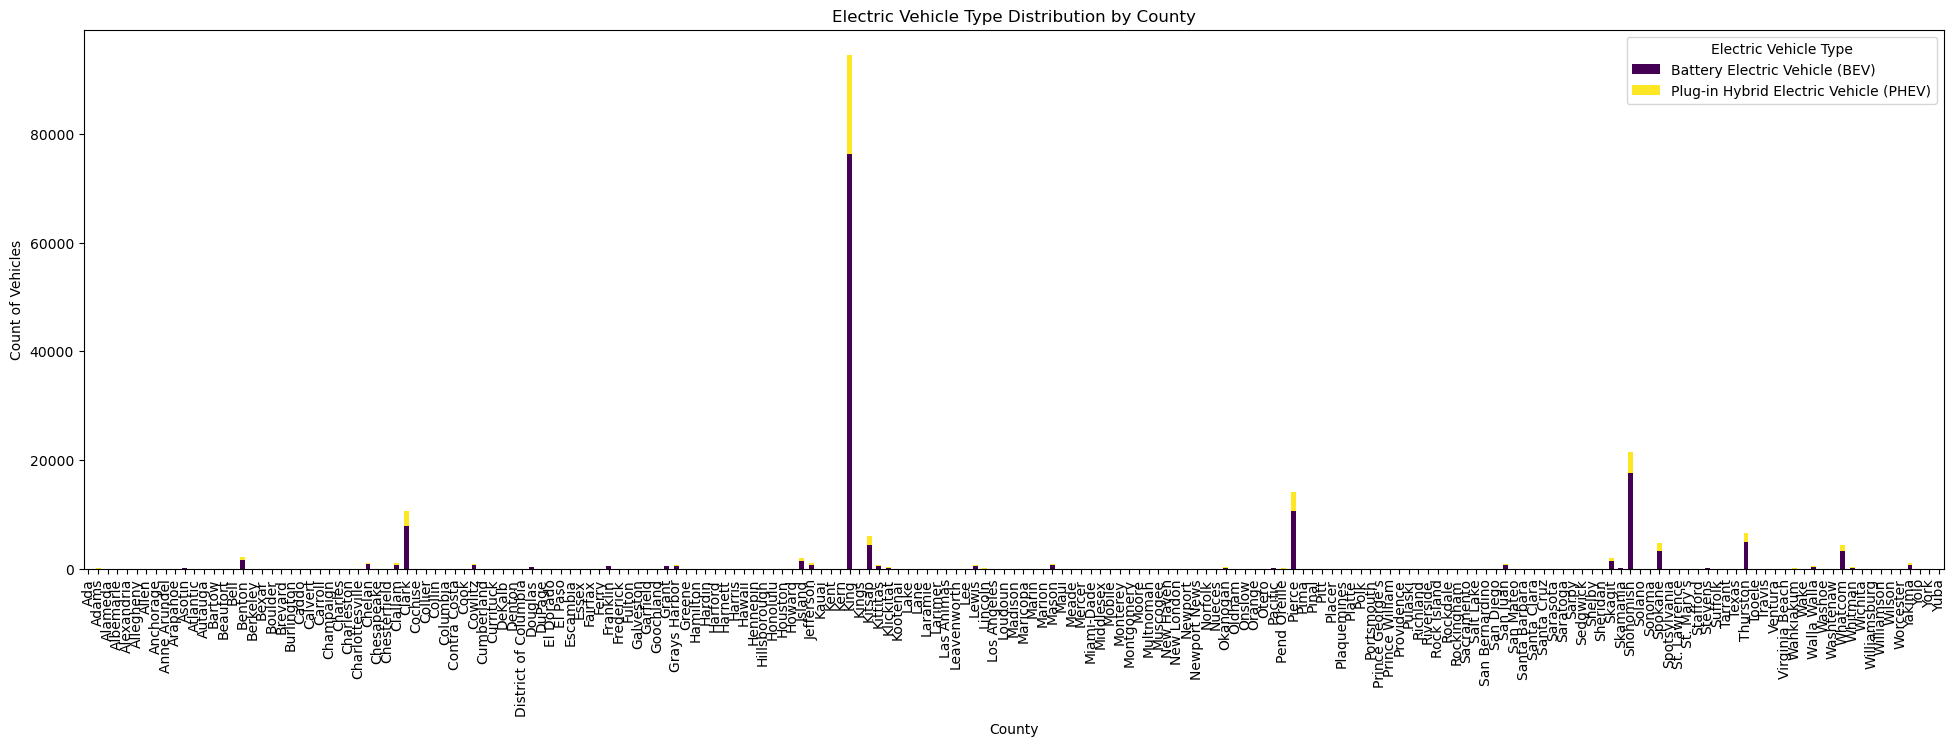

In [56]:
#18. Do certain types of electric vehicles dominate in specific counties?
# Stacked bar chart of Electric Vehicle Type by County
ev_type_county_crosstab.plot(kind='bar', stacked=True, figsize=(24, 7), colormap='viridis')
plt.title('Electric Vehicle Type Distribution by County')
plt.xlabel('County')
plt.ylabel('Count of Vehicles')
plt.legend(title='Electric Vehicle Type')
plt.show()


In [60]:
#20. Are there any legislative districts where vehicles tend to have longer electric ranges?
mean_range_by_district = data_set.groupby('Legislative District')['Electric Range'].mean().sort_values(ascending=False)
print("Legislative districts with longest electric ranges:")
print(mean_range_by_district.head())


Legislative districts with longest electric ranges:
Legislative District
15    71.203057
40    69.081416
16    65.902113
10    65.500649
7     65.276995
Name: Electric Range, dtype: float64


# Multivariate analysis

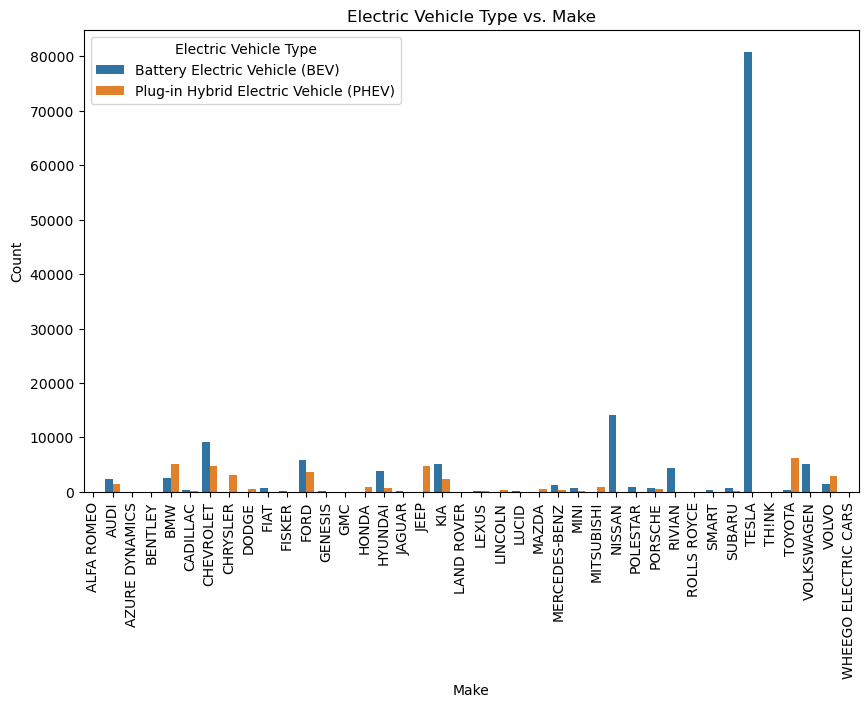

In [61]:
#1. How does the distribution of electric vehicle types vary across different vehicle makes? 
plt.figure(figsize=(10, 6))
sns.countplot(x='Make', hue='Electric Vehicle Type', data=data_set)
plt.title("Electric Vehicle Type vs. Make")
plt.xlabel("Make")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show()



In [62]:
#2. Are certain makes more likely to produce battery electric vehicles (BEVs) or plug-in hybrid electric vehicles (PHEVs)? 
make_ev_type_distribution = data_set.groupby(['Make', 'Electric Vehicle Type']).size().fillna(0)
print(make_ev_type_distribution)


Make                  Electric Vehicle Type                 
ALFA ROMEO            Battery Electric Vehicle (BEV)               0
                      Plug-in Hybrid Electric Vehicle (PHEV)      42
AUDI                  Battery Electric Vehicle (BEV)            2326
                      Plug-in Hybrid Electric Vehicle (PHEV)    1412
AZURE DYNAMICS        Battery Electric Vehicle (BEV)               8
                                                                ... 
VOLKSWAGEN            Plug-in Hybrid Electric Vehicle (PHEV)       0
VOLVO                 Battery Electric Vehicle (BEV)            1457
                      Plug-in Hybrid Electric Vehicle (PHEV)    2831
WHEEGO ELECTRIC CARS  Battery Electric Vehicle (BEV)               0
                      Plug-in Hybrid Electric Vehicle (PHEV)       3
Length: 80, dtype: int64


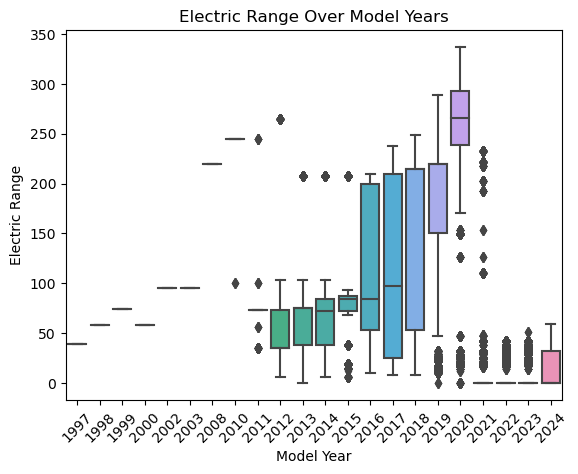

In [63]:
#3. How does the electric range of vehicles change over different model years? 
sns.boxplot(data=data_set, x='Model Year', y='Electric Range')
plt.title('Electric Range Over Model Years')
plt.xticks(rotation=45)
plt.show()


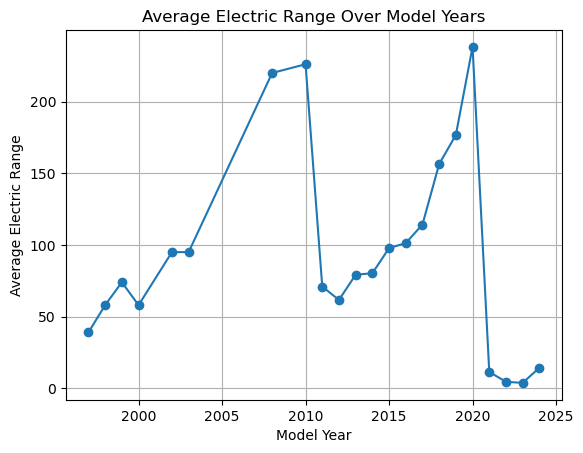

In [64]:
#4. Is there a trend of increasing electric range in newer models? 
mean_range_by_year = data_set.groupby('Model Year')['Electric Range'].mean()
plt.plot(mean_range_by_year.index, mean_range_by_year.values, marker='o')
plt.title('Average Electric Range Over Model Years')
plt.xlabel('Model Year')
plt.ylabel('Average Electric Range')
plt.grid(True)
plt.show()


Mean Base MSRP for BEVs: 886.5918167538898
Mean Base MSRP for PHEVs: 1592.685323540585


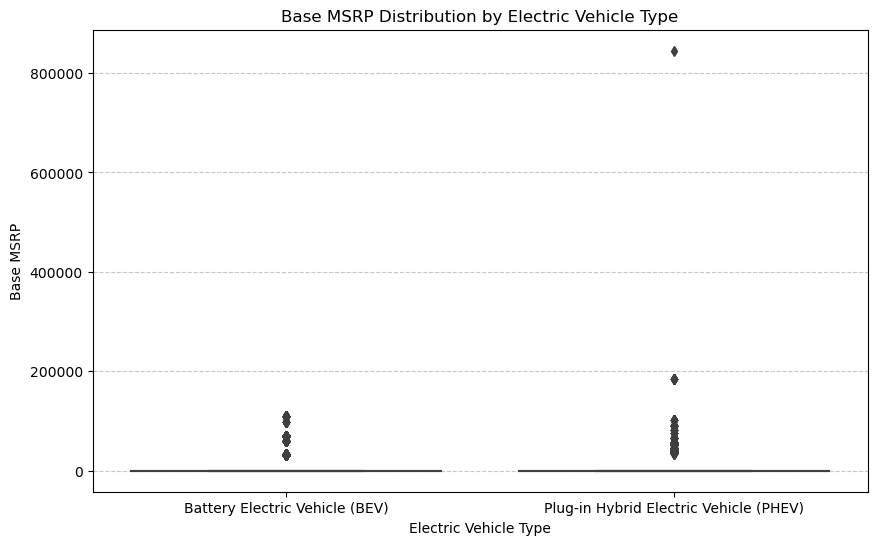

In [65]:
#5. Is there a difference in base MSRP between battery electric vehicles (BEVs) and plug-in hybrid electric vehicles (PHEVs)?
# Filter the dataset for BEVs and PHEVs
bevs = data_set[data_set['Electric Vehicle Type'] == 'Battery Electric Vehicle (BEV)']
phevs = data_set[data_set['Electric Vehicle Type'] == 'Plug-in Hybrid Electric Vehicle (PHEV)']

# Calculate the mean base MSRP for BEVs and PHEVs
mean_base_msrp_bev = bevs['Base MSRP'].mean()
mean_base_msrp_phev = phevs['Base MSRP'].mean()

# Print the mean base MSRP for BEVs and PHEVs
print("Mean Base MSRP for BEVs:", mean_base_msrp_bev)
print("Mean Base MSRP for PHEVs:", mean_base_msrp_phev)

# Plotting
plt.figure(figsize=(10, 6))
sns.boxplot(x='Electric Vehicle Type', y='Base MSRP', data=data_set)
plt.title('Base MSRP Distribution by Electric Vehicle Type')
plt.xlabel('Electric Vehicle Type')
plt.ylabel('Base MSRP')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout
plt.show()

In [66]:
#6. Are BEVs typically more expensive than PHEVs?
#already done in bivariate(question.8)


In [67]:
#7. How does the electric range vary between vehicles that are eligible for clean alternative fuel vehicle incentives and those 
#that are not?
#already done in bivariate(question.13)

In [68]:
#8. Are eligible vehicles likely to have longer electric ranges?
#already done in bivariate(question.14)

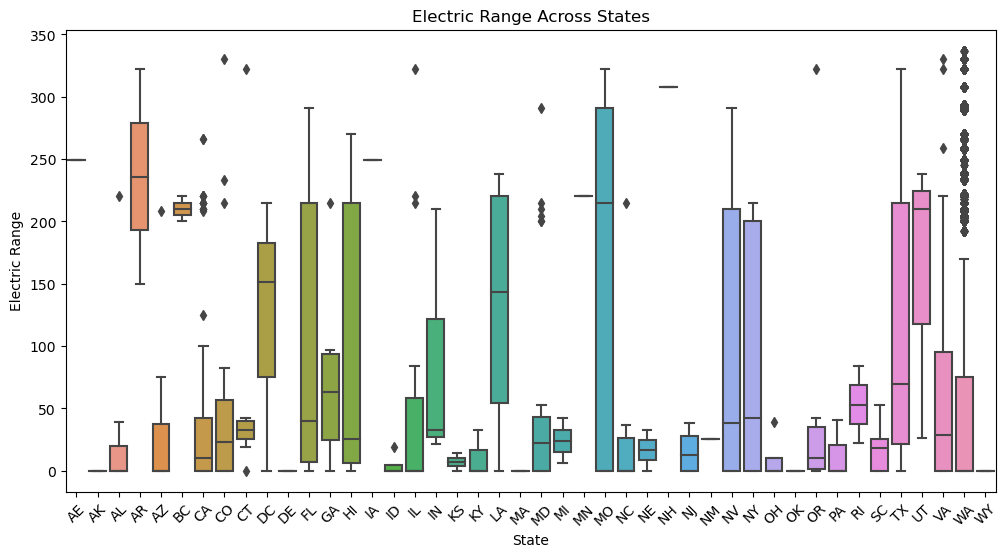

In [69]:
#9. Is there a difference in electric range among electric vehicles from different states? 
plt.figure(figsize=(12, 6))
sns.boxplot(data=data_set, x='State', y='Electric Range')
plt.title('Electric Range Across States')
plt.xticks(rotation=45)
plt.show()


In [70]:
#10. Are electric vehicles in certain states more likely to have longer electric ranges? 
#already done in multivariate (ques.20)

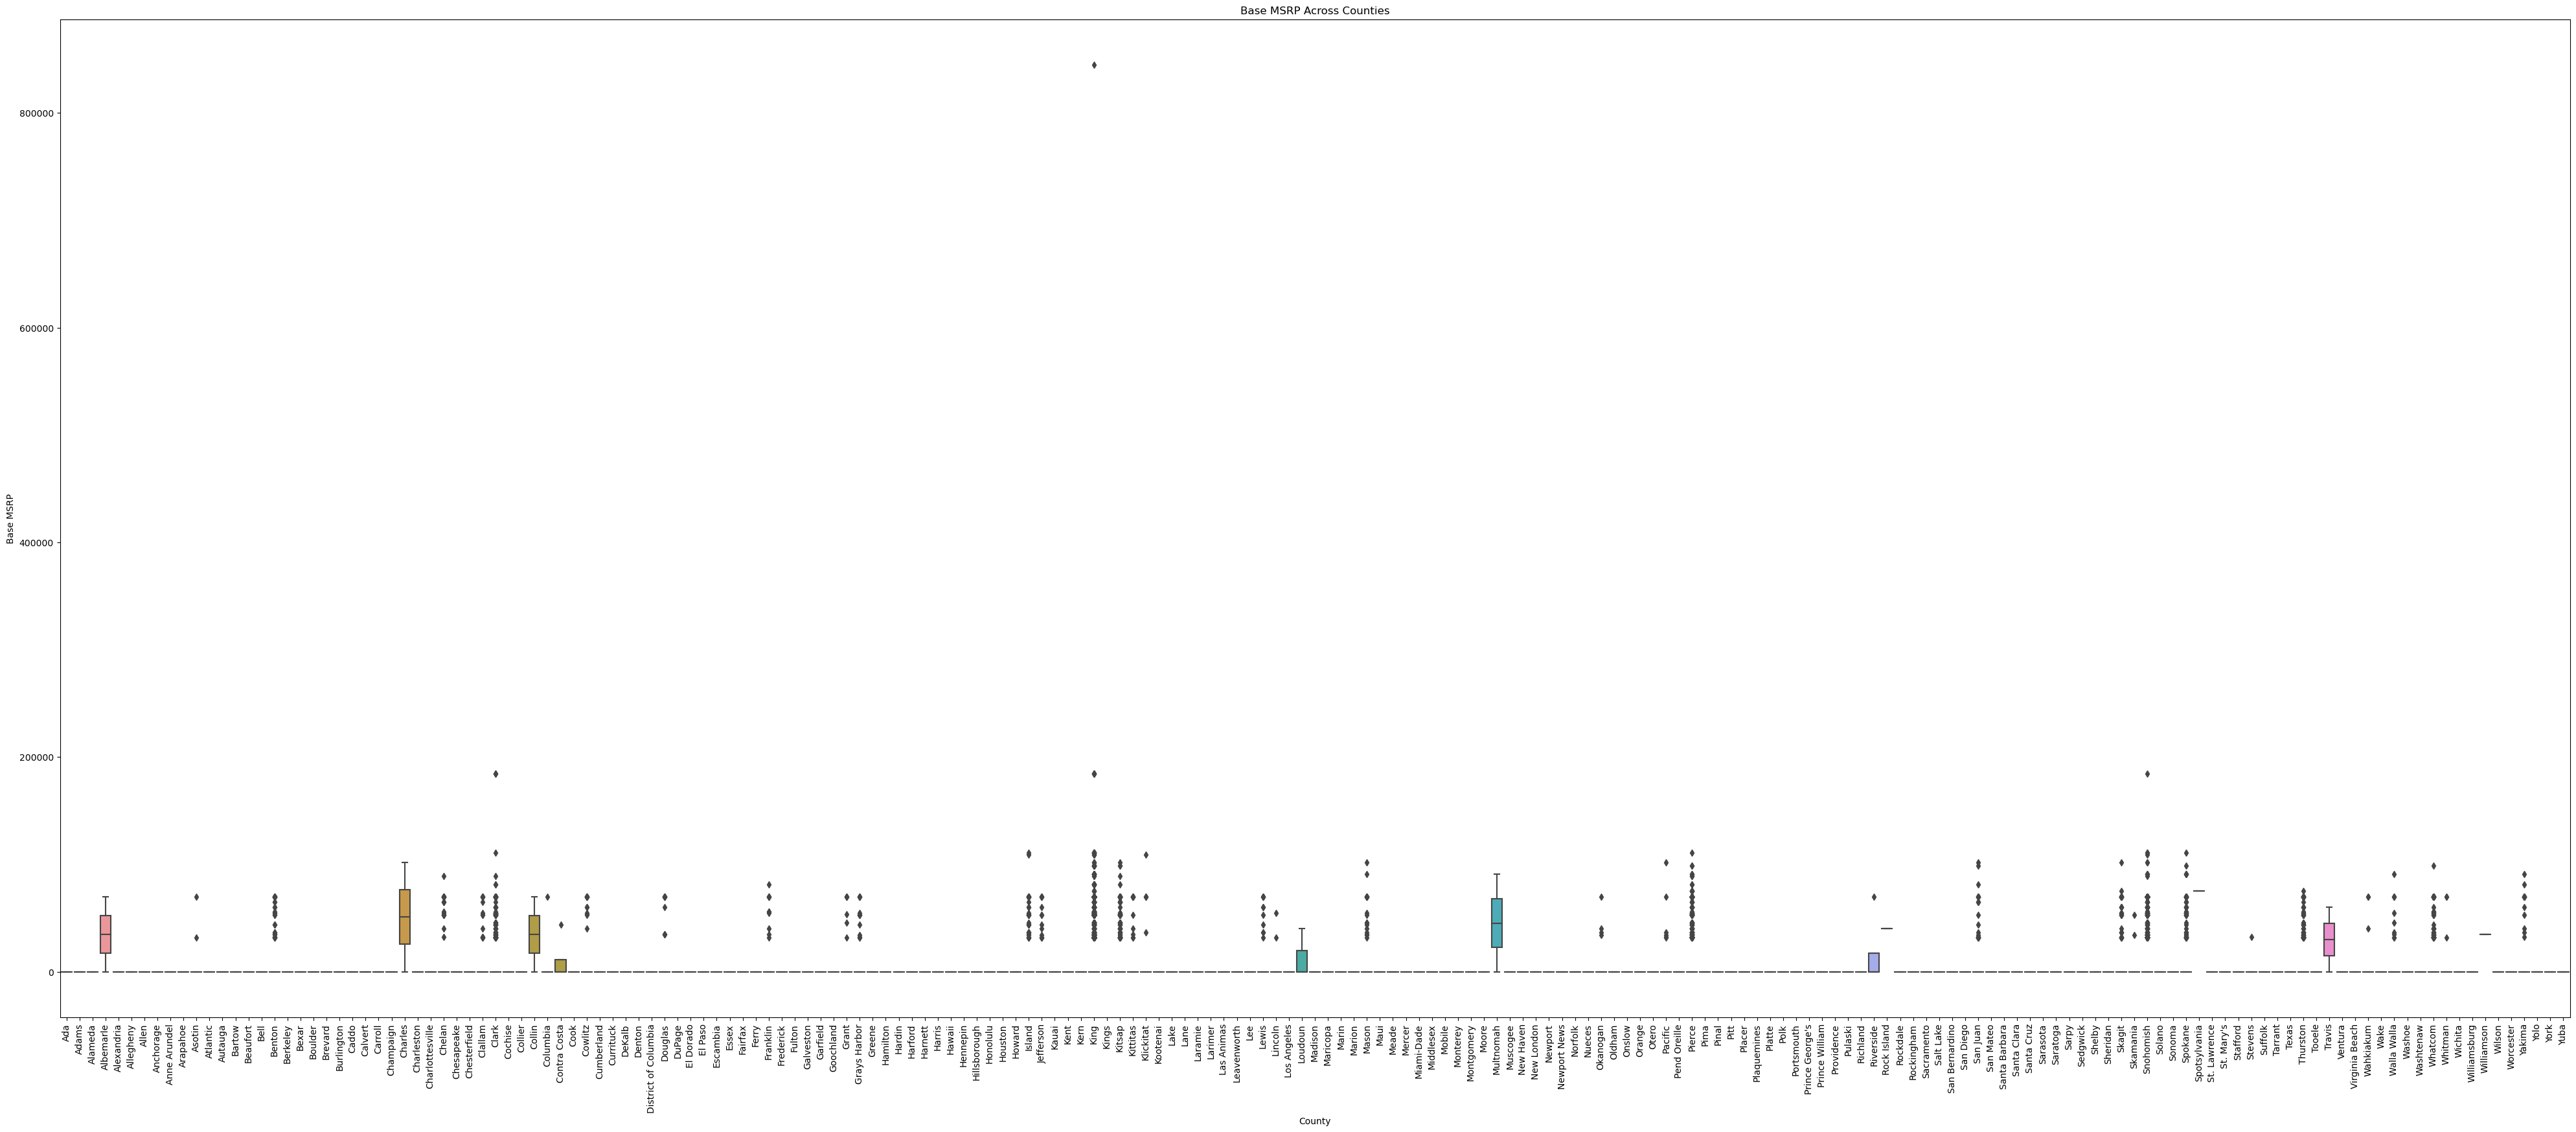

In [71]:
#11. How does base MSRP vary across different counties?
plt.figure(figsize=(50,20))
sns.boxplot(data=data_set, x='County', y='Base MSRP')
plt.title('Base MSRP Across Counties')
plt.xticks(rotation=90)
plt.show()


In [72]:
#13. Is there any correlation between the electric range of vehicles and the legislative district they belong to? 
#already done in bivariate(question.19)

In [73]:
#14. Are there any legislative districts where vehicles tend to have longer electric ranges? 
#already done in bivariate(question.20)


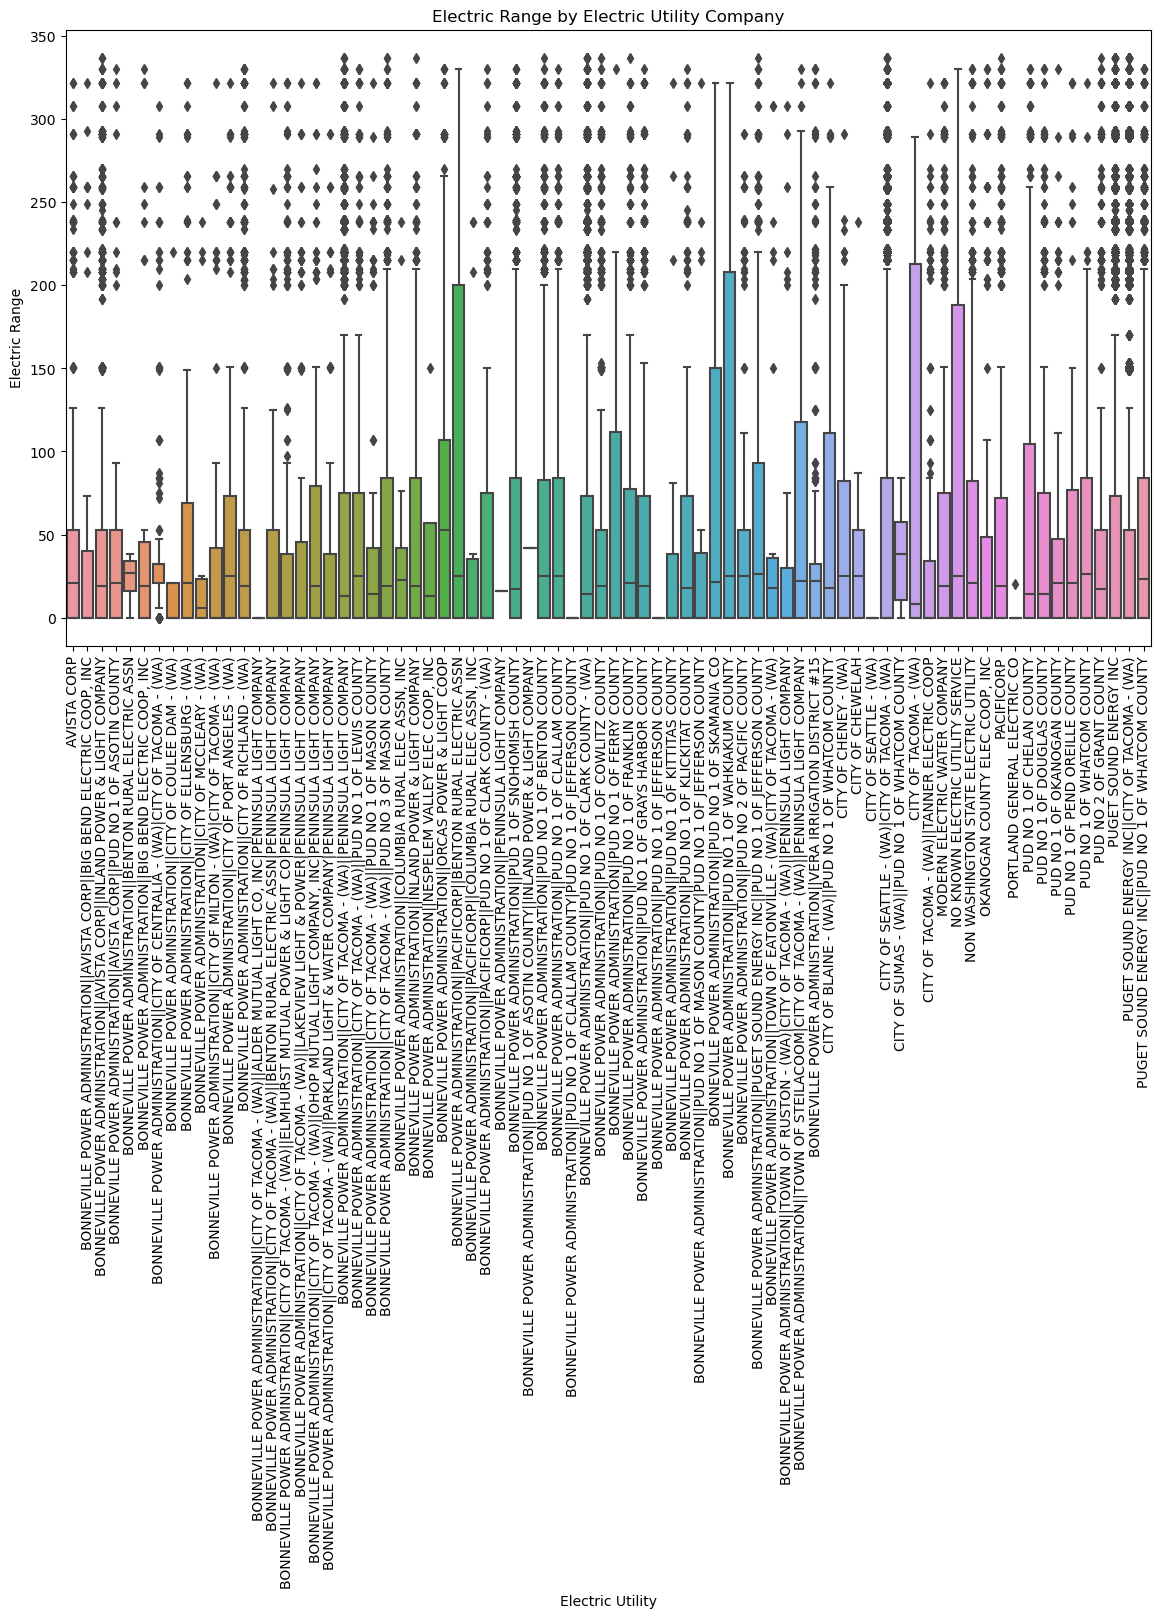

In [74]:
#15. How does the electric range of vehicles vary based on the electric utility company? 
plt.figure(figsize=(14, 8))
sns.boxplot(data=data_set, x='Electric Utility', y='Electric Range')
plt.title('Electric Range by Electric Utility Company')
plt.xticks(rotation=90)
plt.show()


In [75]:
#16. Are there any differences in electric range depending on the utility service area?
mean_range_by_utility = data_set.groupby('Electric Utility')['Electric Range'].mean().sort_values(ascending=False)
print(mean_range_by_utility)


Electric Utility
CITY OF TACOMA - (WA)                                                                                         88.250000
BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF WAHKIAKUM COUNTY                                                 85.868852
BONNEVILLE POWER ADMINISTRATION||ORCAS POWER & LIGHT COOP                                                     80.682927
NO KNOWN ELECTRIC UTILITY SERVICE                                                                             75.987179
BONNEVILLE POWER ADMINISTRATION||PACIFICORP||BENTON RURAL ELECTRIC ASSN                                       75.637168
                                                                                                                ...    
PORTLAND GENERAL ELECTRIC CO                                                                                   4.000000
BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF CLALLAM COUNTY|PUD NO 1 OF JEFFERSON COUNTY                       0.000000
BONNEVILLE POWER ADMINI

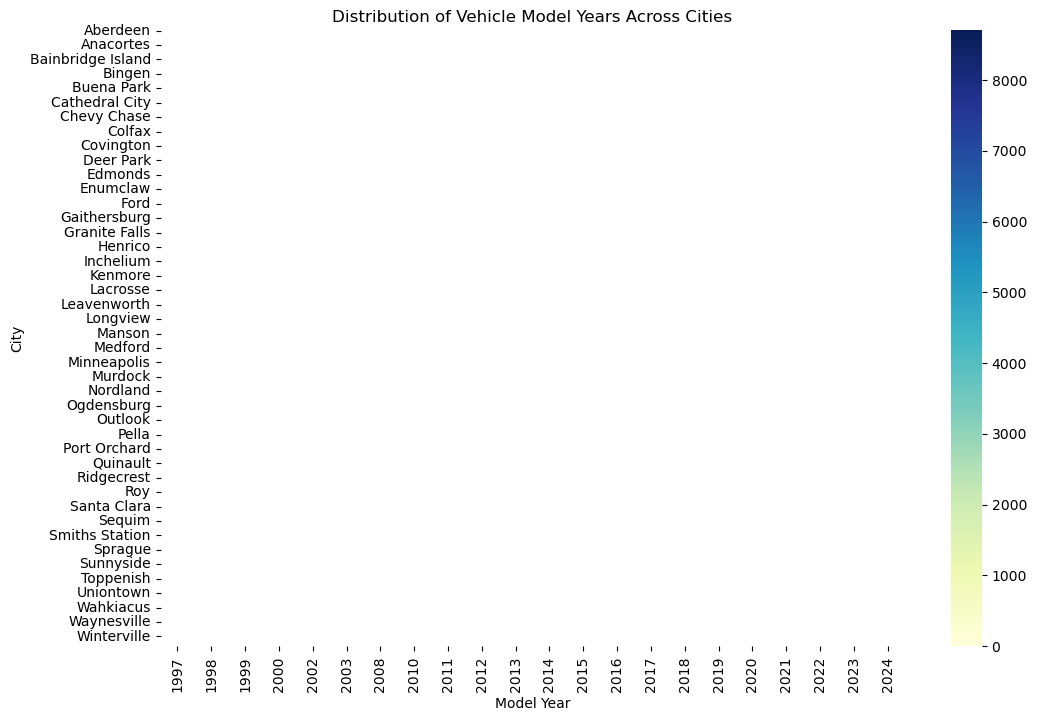

In [76]:
#17. How are vehicle model years distributed across different cities? 
# Group by city and vehicle model year
city_model_year_distribution = data_set.groupby(['City', 'Model Year']).size().unstack(fill_value=0)

# Create a heatmap of the distribution
plt.figure(figsize=(12, 8))
sns.heatmap(city_model_year_distribution, cmap="YlGnBu", linewidths=.5)
plt.title('Distribution of Vehicle Model Years Across Cities')
plt.xlabel('Model Year')
plt.ylabel('City')
plt.show()

In [77]:
#18. Are there any cities where newer models are more prevalent? 
mean_year_by_city = data_set.groupby('City')['Model Year'].mean().sort_values(ascending=False)
print(mean_year_by_city)


City
Wellpinit      2024.0
Carlisle       2024.0
Home           2024.0
Montclair      2024.0
Mc Lean        2024.0
                ...  
Mckinney       2013.0
Norfolk        2013.0
Leander        2012.0
Hughesville    2012.0
Malott         2011.0
Name: Model Year, Length: 726, dtype: float64


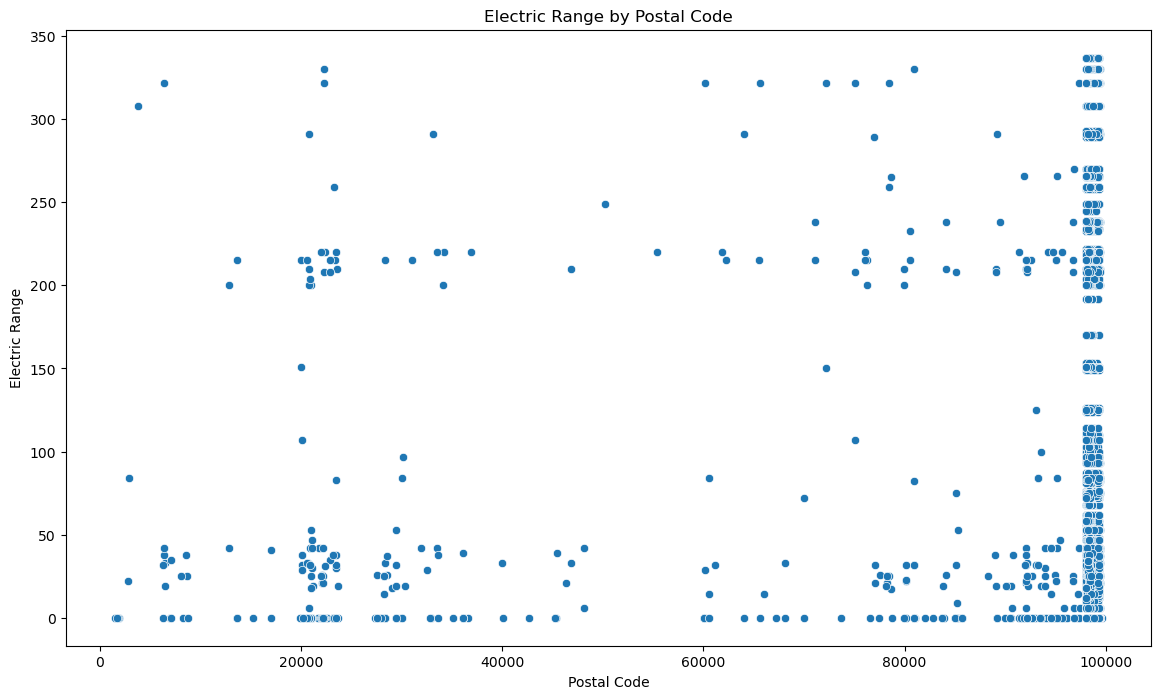

In [78]:
#19. Is there any relationship between the electric range of vehicles and their postal codes?
plt.figure(figsize=(14, 8))
sns.scatterplot(data=data_set, x='Postal Code', y='Electric Range')
plt.title('Electric Range by Postal Code')
plt.show()


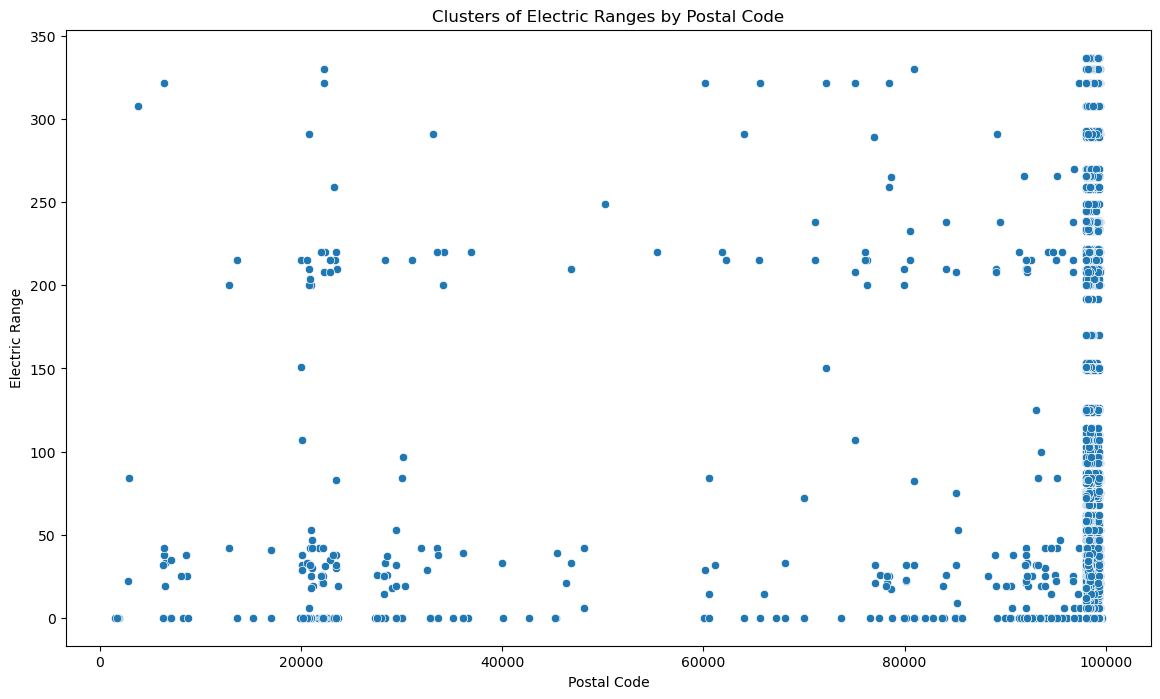

In [79]:
#20. Are there any clusters of vehicles with particularly long or short electric ranges in specific areas? 
plt.figure(figsize=(14, 8))
sns.scatterplot(data=data_set, x='Postal Code', y='Electric Range')
plt.title('Clusters of Electric Ranges by Postal Code')
plt.show()

# Data Preprocessing

Encoding Categorical Variables

In [80]:

"""Which categorical variables need to be encoded for model building? What 
encoding techniques will be used for each categorical variable (e.g., one-hot encoding, label encoding)?"""

import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Identify categorical variables
categorical_vars = ['County', 'City', 'State', 'Make', 'Model', 'Electric Vehicle Type', 'Electric Utility', 'Legislative District']

# One-Hot Encoding using pandas get_dummies
#(This function automatically handles one-hot encoding for the specified columns)
#(drops the first level to avoid multicollinearity.)
data_encoded = pd.get_dummies(data_set, columns=categorical_vars, drop_first=True)

# Display the first few rows of the encoded data
print("\nData after One-Hot Encoding:")
print(data_encoded.head())




Data after One-Hot Encoding:
   VIN (1-10) Postal Code  Model Year  \
0  WAUTPBFF4H     98126.0        2017   
1  WAUUPBFF2J     98502.0        2018   
2  5YJSA1E22H     98516.0        2017   
3  1C4JJXP62M     98589.0        2021   
4  5YJ3E1EC9L     98902.0        2020   

  Clean Alternative Fuel Vehicle (CAFV) Eligibility  Electric Range  \
0             Not eligible due to low battery range              16   
1             Not eligible due to low battery range              16   
2           Clean Alternative Fuel Vehicle Eligible             210   
3             Not eligible due to low battery range              25   
4           Clean Alternative Fuel Vehicle Eligible             308   

   Base MSRP  DOL Vehicle ID                Vehicle Location  \
0        0.0       235085336    POINT (-122.374105 47.54468)   
1        0.0       237896795   POINT (-122.943445 47.059252)   
2        0.0       154498865    POINT (-122.78083 47.083975)   
3        0.0       154525493    POINT (-

Feature Scaling

In [84]:
""""Do numeric variables exhibit different scales or magnitudes? Will feature scaling techniques such 
as standardization or normalization be applied?"""
# Identify numeric variables
numeric_vars = ['Model Year', 'Electric Range', 'Base MSRP', '2020 Census Tract']

# Display the first few rows of numeric data before scaling
print("\nNumeric Data before Scaling:")
print(data_set[numeric_vars].head())

# Standardization
scaler = StandardScaler()
data_set[numeric_vars] = scaler.fit_transform(data_set[numeric_vars])

# Display the first few rows of numeric data after scaling
print("\nNumeric Data after Scaling:")
print(data_set[numeric_vars].head())



Numeric Data before Scaling:
   Model Year  Electric Range  Base MSRP  2020 Census Tract
0        2017              16        0.0       5.303301e+10
1        2018              16        0.0       5.306701e+10
2        2017             210        0.0       5.306701e+10
3        2021              25        0.0       5.306701e+10
4        2020             308        0.0       5.307700e+10

Numeric Data after Scaling:
   Model Year  Electric Range  Base MSRP  2020 Census Tract
0   -1.197471       -0.457643  -0.126412           0.035901
1   -0.863149       -0.457643  -0.126412           0.057219
2   -1.197471        1.664992  -0.126412           0.057220
3    0.139816       -0.359170  -0.126412           0.057220
4   -0.194506        2.737251  -0.126412           0.063483


Addressing Outliers

In [88]:
"""" Are there any outliers present in numeric variables? How will outliers be identified and 
addressed (e.g., removal, transformation)? """
# Example: Handling outliers by clipping values within 1.5 IQR
for col in numeric_vars:
    Q1 = data_set[col].quantile(0.25)
    Q3 = data_set[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data_set[col] = np.clip(data_set[col], lower_bound, upper_bound)

# Display the first few rows of numeric data after outlier handling
print("\nNumeric Data after Outlier Handling:")
print(data_set[numeric_vars].head())



Numeric Data after Outlier Handling:
   Model Year  Electric Range  Base MSRP  2020 Census Tract
0   -1.197471       -0.457643  -0.126412           0.035901
1   -0.863149       -0.457643  -0.126412           0.057219
2   -1.197471        1.418810  -0.126412           0.057220
3    0.139816       -0.359170  -0.126412           0.057220
4   -0.194506        1.418810  -0.126412           0.063483


Handling Categorical Variables with Many Categories

In [90]:
"""Are there categorical variables with a large number of 
unique categories? How will variables with high cardinality be handled during preprocessing (e.g., frequency encoding, 
grouping rare categories)?"""
for col in categorical_vars:
    if col in data_set.columns:
        freq_encoding = data_set[col].value_counts().to_dict()
        data_set[col] = data_set[col].map(freq_encoding)

# Display the first few rows after frequency encoding
print("\nData after Frequency Encoding:")
print(data_set.head())


Data after Frequency Encoding:
   VIN (1-10)   County     City   State Postal Code  Model Year   Make  Model  \
0  WAUTPBFF4H  94460.0  30045.0  181060     98126.0   -1.197471   3738    553   
1  WAUUPBFF2J   6600.0   4397.0  181060     98502.0   -0.863149   3738    553   
2  5YJSA1E22H   6600.0    960.0  181060     98516.0   -1.197471  80819   7731   
3  1C4JJXP62M   6600.0     93.0  181060     98589.0    0.139816   4690   3543   
4  5YJ3E1EC9L   1034.0    687.0  181060     98902.0   -0.194506  80819  30150   

  Electric Vehicle Type Clean Alternative Fuel Vehicle (CAFV) Eligibility  \
0                 39485             Not eligible due to low battery range   
1                 39485             Not eligible due to low battery range   
2                141973           Clean Alternative Fuel Vehicle Eligible   
3                 39485             Not eligible due to low battery range   
4                141973           Clean Alternative Fuel Vehicle Eligible   

   Electric Range 

Feature Engineering

In [91]:
"""Are there opportunities for creating new features based on existing ones? How will feature 
engineering techniques like polynomial features or interaction terms be applied? """
# Example: Create interaction terms
data_set['Model_Year_MSRP_Interaction'] = data_set['Model Year'] * data_set['Base MSRP']

# Display the first few rows after feature engineering
print("\nData after Feature Engineering:")
print(data_set.head())



Data after Feature Engineering:
   VIN (1-10)   County     City   State Postal Code  Model Year   Make  Model  \
0  WAUTPBFF4H  94460.0  30045.0  181060     98126.0   -1.197471   3738    553   
1  WAUUPBFF2J   6600.0   4397.0  181060     98502.0   -0.863149   3738    553   
2  5YJSA1E22H   6600.0    960.0  181060     98516.0   -1.197471  80819   7731   
3  1C4JJXP62M   6600.0     93.0  181060     98589.0    0.139816   4690   3543   
4  5YJ3E1EC9L   1034.0    687.0  181060     98902.0   -0.194506  80819  30150   

  Electric Vehicle Type Clean Alternative Fuel Vehicle (CAFV) Eligibility  \
0                 39485             Not eligible due to low battery range   
1                 39485             Not eligible due to low battery range   
2                141973           Clean Alternative Fuel Vehicle Eligible   
3                 39485             Not eligible due to low battery range   
4                141973           Clean Alternative Fuel Vehicle Eligible   

   Electric Range

Normalization of Coordinates

In [92]:
""" How will the coordinates in the 'Vehicle Location' column be normalized for 
consistency? Will latitude and longitude values be separated into distinct variables? """
# Split latitude and longitude into distinct variables
if 'Vehicle Location' in data_set.columns:
    # Check the number of valid 'Vehicle Location' entries
    valid_locations = data_set['Vehicle Location'].dropna().str.split(',', expand=True)
    if valid_locations.shape[1] == 2:
        # Separate into latitude and longitude
        data_set[['Latitude', 'Longitude']] = valid_locations
        data_set['Latitude'] = pd.to_numeric(data['Latitude'], errors='coerce')
        data_set['Longitude'] = pd.to_numeric(data['Longitude'], errors='coerce')
        data_set = data_set.drop(columns=['Vehicle Location'])
        
        # Display the first few rows of latitude and longitude
        print("\nLatitude and Longitude Data:")
        print(data_set[['Latitude', 'Longitude']].head())
        
        # Normalize coordinates (if needed)
        scaler = StandardScaler()
        data_set[['Latitude', 'Longitude']] = scaler.fit_transform(data[['Latitude', 'Longitude']])
        
        # Display the first few rows of normalized coordinates
        print("\nNormalized Latitude and Longitude Data:")
        print(data_set[['Latitude', 'Longitude']].head())
    else:
        print("\nVehicle Location data is not in the expected format (latitude, longitude).")
else:
    print("\n'Vehicle Location' column not found in the data.")



Vehicle Location data is not in the expected format (latitude, longitude).


Removing Redundant Variables

In [94]:
"""Are there any variables that provide redundant or irrelevant information for 
model building? How will redundant variables be identified and removed to simplify the dataset?"""
if 'Postal Code' in data_set.columns:
    data_set = data_set.drop(columns=['Postal Code'])
print("\nData after Removing Redundant Variables:")
print(data_set.head())


Data after Removing Redundant Variables:
   VIN (1-10)   County     City   State  Model Year   Make  Model  \
0  WAUTPBFF4H  94460.0  30045.0  181060   -1.197471   3738    553   
1  WAUUPBFF2J   6600.0   4397.0  181060   -0.863149   3738    553   
2  5YJSA1E22H   6600.0    960.0  181060   -1.197471  80819   7731   
3  1C4JJXP62M   6600.0     93.0  181060    0.139816   4690   3543   
4  5YJ3E1EC9L   1034.0    687.0  181060   -0.194506  80819  30150   

  Electric Vehicle Type Clean Alternative Fuel Vehicle (CAFV) Eligibility  \
0                 39485             Not eligible due to low battery range   
1                 39485             Not eligible due to low battery range   
2                141973           Clean Alternative Fuel Vehicle Eligible   
3                 39485             Not eligible due to low battery range   
4                141973           Clean Alternative Fuel Vehicle Eligible   

   Electric Range  Base MSRP  Legislative District  DOL Vehicle ID  \
0       -0

Dealing with Highly Correlated Variables

In [95]:
"""Are there pairs of variables that are highly correlated with each other? 
How will multicollinearity be addressed to prevent model instability?"""
# Example: Drop variables that are not useful
if 'Postal Code' in data_set.columns:
    data_set = data_set.drop(columns=['Postal Code'])

# Display the first few rows after removing redundant variables
print("\nData after Removing Redundant Variables:")
print(data_set.head())



Data after Removing Redundant Variables:
   VIN (1-10)   County     City   State  Model Year   Make  Model  \
0  WAUTPBFF4H  94460.0  30045.0  181060   -1.197471   3738    553   
1  WAUUPBFF2J   6600.0   4397.0  181060   -0.863149   3738    553   
2  5YJSA1E22H   6600.0    960.0  181060   -1.197471  80819   7731   
3  1C4JJXP62M   6600.0     93.0  181060    0.139816   4690   3543   
4  5YJ3E1EC9L   1034.0    687.0  181060   -0.194506  80819  30150   

  Electric Vehicle Type Clean Alternative Fuel Vehicle (CAFV) Eligibility  \
0                 39485             Not eligible due to low battery range   
1                 39485             Not eligible due to low battery range   
2                141973           Clean Alternative Fuel Vehicle Eligible   
3                 39485             Not eligible due to low battery range   
4                141973           Clean Alternative Fuel Vehicle Eligible   

   Electric Range  Base MSRP  Legislative District  DOL Vehicle ID  \
0       -0

Splitting Data into Training and Testing Sets

In [96]:
"""What proportion of the dataset will be allocated to training and 
testing sets?"""
# 9. Splitting Data into Training and Testing Sets
target = 'Clean Alternative Fuel Vehicle (CAFV) Eligibility'

if target in data_set.columns:
    # Drop rows with NaNs in the target variable
    data_set.dropna(subset=[target], inplace=True)
    
    X = data_set.drop(columns=[target])
    y = data_set[target]
    
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Display the shapes of the training and testing sets
    print("\nTraining and Testing Set Shapes:")
    print(f"X_train: {X_train.shape}, y_train: {y_train.shape}")
    print(f"X_test: {X_test.shape}, y_test: {y_test.shape}")
else:
    print(f"Target variable '{target}' not found in the data.")



Training and Testing Set Shapes:
X_train: (145166, 18), y_train: (145166,)
X_test: (36292, 18), y_test: (36292,)


# machine learning model building

In [97]:
# Split the data into features and target variable
X = data_set.drop(columns=['Clean Alternative Fuel Vehicle (CAFV) Eligibility'])
y = data_set['Clean Alternative Fuel Vehicle (CAFV) Eligibility']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [98]:
# Define preprocessing steps for numerical and categorical features
numeric_features = X.select_dtypes(include=['int', 'float']).columns
categorical_features = X.select_dtypes(include=['object']).columns

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [99]:
# Combine preprocessing steps for numerical and categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])


In [100]:
# Define the logistic regression model
log_reg = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(multi_class='auto'))  # Change solver based on your dataset size and type
])


In [101]:
# Fit the model
log_reg.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['County', 'City', 'State', 'Model Year', 'Make', 'Model',
       'Electric Range', 'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Electric Utility', '2020 Census Tract', 'Model_Year_MSRP_Interaction'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['VIN (1-10)', 'Vehicle Location', 'Area Type'], dtype='object'))])),
                ('classifier', LogisticRegression())])

In [102]:
# Make predictions
y_pred = log_reg.predict(X_test)


In [103]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)



Accuracy: 0.9999448914361292
Confusion Matrix:
 [[13267     0     2]
 [    0 19068     0]
 [    0     0  3955]]
Classification Report:
                                                               precision    recall  f1-score   support

                     Clean Alternative Fuel Vehicle Eligible       1.00      1.00      1.00     13269
Eligibility unknown as battery range has not been researched       1.00      1.00      1.00     19068
                       Not eligible due to low battery range       1.00      1.00      1.00      3955

                                                    accuracy                           1.00     36292
                                                   macro avg       1.00      1.00      1.00     36292
                                                weighted avg       1.00      1.00      1.00     36292

